In [1]:
!pip install aquacrop==2.2.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.3/446.3 kB 32.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of numba to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 54.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: cffi
    Found existing installation: cffi 1.16.0
    Uninstalling cffi-1.16.0:
      Successfully uninstalled cffi-1.16.0
  Attempting uninstall: numba
    Found existing installation: numba 0.58.1
    Uninstalling numba-0.58.1:
      Successfully uninstalled numba-0.58.1
ERROR: pip's dependency resolver does not currently take into account all the packages 

In [2]:
!pip install numpy==1.22

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 32.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
aquacrop 2.2.3 requires numpy<1.22.0,>=1.18.0, but you have numpy 1.22.0 which is incompatible.
librosa 0.10.1 requires numpy!=1.22.0,!=1.22.1,!=1.22.2,>=1.20.3, but you have numpy 1.22.0 which is incompatible.
plotnine 0.12.4 requires numpy>=1.23.0, but you have numpy 1.22.0 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 1.2

In [3]:
import aquacrop

 Compiling modules... This could take some time.
 Note: The compilation is only necessary the first time that the library is used.


In [4]:
from aquacrop import AquaCropModel, Soil, Crop, InitialWaterContent
from aquacrop.utils import prepare_weather, get_filepath
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import  scipy.stats as stats

# **Import Historical Data**

In [5]:
statsAlm8019_Secano={'Yield (tonne/ha)':[0.916,	0.63,	1.472,	1.981,	1.7,	1.4,	1.63,	2,
                                         0.485,	0.37,	0.9,	2.5,	2.263,	0.71,	1.806,	1.3,
                                         1.9,	1.7,	2.2,	0.715,	2.372,	3.198,	0.959,	2.355,	1.438,
                                         2.771,	0.742,	1.864,	0.261]};

statsAlm8019_Secano_df=pd.DataFrame(statsAlm8019_Secano)

#statsAlm8019_Secano_df['Yield (tonne/ha)'].fillna(statsAlm8019_Secano_df['Yield (tonne/ha)'].mean(), inplace=True)

# **Define Function to run model under different conditions**

In [6]:
def sensitivity_analysis(p_date, IWC):
 #barley= Crop('BarleyGDD', planting_date=p_date)
 #barley= Crop('BarleyGDD', planting_date=p_date, harvest_date='06/01',CCx=0.48, CGC=0.1191, WP=14.9,CDC=0.0015)
 barley= Crop('BarleyGDD', planting_date=p_date, CCx=0.48, CGC=0.0083, WP=14.9,CDC=0.0001)
 loam = Soil(soil_type='Loam')
 InitWC = IWC
 start='1985/01/01'
 end='2014/12/31'

 #filepath=get_filepath('/content/Agri4Cast.txt')
 filepath=get_filepath('/content/ACCESS_CM2.txt')
 Agri4Cast = prepare_weather(filepath)
 Agri4Cast_df=pd.read_csv(filepath,sep='\t')

 modelAgri4Cast = AquaCropModel(sim_start_time=start,
                      sim_end_time=end,
                      weather_df=Agri4Cast,
                      soil=loam,
                      crop=barley,
                      initial_water_content=InitWC)
 modelAgri4Cast.run_model(till_termination=True)
 #Out=modelAgri4Cast._outputs.final_stats['Yield (tonne/ha)']
 Out=modelAgri4Cast._outputs.final_stats
 return (Out)

In [7]:
def sensitivity_analysis_Models(p_date, IWC,Filepath1, Filepath2, Filepath3, Filepath4, Filepath5, Filepath6, Filepath7):
 #barley= Crop('BarleyGDD', planting_date=p_date)
 #barley= Crop('BarleyGDD', planting_date=p_date, CCx=0.48, CGC=0.0083, WP=14.9,CDC=0.0001)
 barley= Crop('BarleyGDD', planting_date=p_date, CCx=0.48, CGC=0.0083, WP=14.9,CDC=0.0001)
 loam = Soil(soil_type='Loam')
 InitWC = IWC
 start='1985/01/01'
 end='2014/12/31'

 filepath=get_filepath(Filepath1)
 ACCESS_CM2 = prepare_weather(filepath)
 modelACCESS_CM2 = AquaCropModel(sim_start_time=start,
                      sim_end_time=end,
                      weather_df=ACCESS_CM2,
                      soil=loam,
                      crop=barley,
                      initial_water_content=InitWC)
 modelACCESS_CM2.run_model(till_termination=True)

 filepath=get_filepath(Filepath2)
 CNRM_ESM2_1 = prepare_weather(filepath)
 CNRM_ESM2_1_df=pd.read_csv(filepath,sep='\t')

 modelCNRM_ESM2_1 = AquaCropModel(sim_start_time=start,
                      sim_end_time=end,
                      weather_df=CNRM_ESM2_1,
                      soil=loam,
                      crop=barley,
                      initial_water_content=InitWC)
 modelCNRM_ESM2_1.run_model(till_termination=True)

 filepath=get_filepath(Filepath3)
 EC_Earth3_Veg_LR = prepare_weather(filepath)
 EC_Earth3_Veg_LR_df=pd.read_csv(filepath,sep='\t')

 modelEC_Earth3_Veg_LR = AquaCropModel(sim_start_time=start,
                      sim_end_time=end,
                      weather_df=EC_Earth3_Veg_LR,
                      soil=loam,
                      crop=barley,
                      initial_water_content=InitWC)
 modelEC_Earth3_Veg_LR.run_model(till_termination=True)

 filepath=get_filepath(Filepath4)
 HadGEM3_GC31_LL = prepare_weather(filepath)
 HadGEM3_GC31_LL_df=pd.read_csv(filepath,sep='\t')

 modelHadGEM3_GC31_LL = AquaCropModel(sim_start_time=start,
                      sim_end_time=end,
                      weather_df=HadGEM3_GC31_LL,
                      soil=loam,
                      crop=barley,
                      initial_water_content=InitWC)
 modelHadGEM3_GC31_LL.run_model(till_termination=True)

 filepath=get_filepath(Filepath5)
 IPSL_CM6A_LR = prepare_weather(filepath)
 IPSL_CM6A_LR_df=pd.read_csv(filepath,sep='\t')

 modelIPSL_CM6A_LRL = AquaCropModel(sim_start_time=start,
                      sim_end_time=end,
                      weather_df=IPSL_CM6A_LR,
                      soil=loam,
                      crop=barley,
                      initial_water_content=InitWC)
 modelIPSL_CM6A_LRL .run_model(till_termination=True)

 filepath=get_filepath(Filepath6)
 MIROC6 = prepare_weather(filepath)
 MIROC6_df=pd.read_csv(filepath,sep='\t')

 modelMIROC6 = AquaCropModel(sim_start_time=start,
                      sim_end_time=end,
                      weather_df=MIROC6,
                      soil=loam,
                      crop=barley,
                      initial_water_content=InitWC)
 modelMIROC6.run_model(till_termination=True)

 filepath=get_filepath(Filepath7  )
 NorESM2_MM = prepare_weather(filepath)
 NorESM2_MM_df=pd.read_csv(filepath,sep='\t')

 modelNorESM2_MM = AquaCropModel(sim_start_time=start,
                      sim_end_time=end,
                      weather_df=NorESM2_MM,
                      soil=loam,
                      crop=barley,
                      initial_water_content=InitWC)
 modelNorESM2_MM.run_model(till_termination=True)

 ModelMean=(modelACCESS_CM2._outputs.final_stats['Yield (tonne/ha)']+
        modelCNRM_ESM2_1._outputs.final_stats['Yield (tonne/ha)']+
        modelEC_Earth3_Veg_LR._outputs.final_stats['Yield (tonne/ha)']+
        modelHadGEM3_GC31_LL._outputs.final_stats['Yield (tonne/ha)']+
        modelIPSL_CM6A_LRL._outputs.final_stats['Yield (tonne/ha)']+
        modelMIROC6._outputs.final_stats['Yield (tonne/ha)']+
        modelNorESM2_MM._outputs.final_stats['Yield (tonne/ha)'])/7

#Add the spread of the results
 ModelMean=pd.DataFrame(ModelMean)

 return (ModelMean)

# **Function to Linearly detrend**

In [8]:
def linear_detrend(data,col):
    detrended_data=pd.DataFrame(columns=[col])
    # Create an array of time indices (assuming data is evenly spaced)
    data=data[col]
    time_indices = np.arange(len(data))

    # Fit a linear model (y = mx + b) to the data
    slope, intercept = np.polyfit(time_indices, data, 1)

    # Calculate the detrended data by subtracting the linear trend
    detrended_data[col] =data - (slope * time_indices + intercept)

    return detrended_data

# **Define Function for Rolling Averages**

In [9]:
def rolling_averages(input_df, window_size):
    # Create an empty DataFrame to store rolling averages
    rolling_averages_df = pd.DataFrame()

    # Calculate rolling averages for each column
    for column_name in input_df.columns:
        rolling_average = input_df[column_name].rolling(window=window_size).mean().dropna()
        rolling_averages_df[column_name] = rolling_average

    return rolling_averages_df

# **Function to calclate multiple rolling averages**

In [10]:
def calculate_and_plot_rolling_boxplots(data, window_range):

    rolling_averages = {}
    for window_size in window_range:
        rolling_averages[window_size] = data.rolling(window=window_size).mean()

    # Create a DataFrame from the rolling averages
    rolling_df = pd.DataFrame(rolling_averages)
    return (rolling_df)

# **Define Function to calculate Correlation Coefficients**

In [11]:
def corr_coeff (Model, statsAlm8019_Secano_df,time):
 corrModels = {}
 pearson_corr = {}
 pearson_p_value = {}
 spearman_corr = {}
 spearman_p_value = {}
 Correlations=pd.DataFrame()
 p_values=pd.DataFrame()

# Iterate over different rolling window sizes
 for column_name in Model.columns:
  k=column_name
  for t in range(1, time):

    HistoricalRollinAvg=pd.DataFrame(statsAlm8019_Secano_df['Yield (tonne/ha)'].rolling(window=t).mean().dropna())
    ModelsRollingAvg=pd.DataFrame(Model[k].rolling(window=t).mean().dropna())
    # Calculate correlation coefficients
    #corrModels[t] = HistoricalRollinAvg['Yield (tonne/ha)'].corr(ModelsRollingAvg[k], method='pearson')

    # Calculate Pearson correlation coefficient and its p-value
    pearson_corr[t], pearson_p_value[t] = stats.pearsonr(HistoricalRollinAvg['Yield (tonne/ha)'], ModelsRollingAvg[k])

# Calculate Spearman correlation coefficient and its p-value
    #spearman_corr[t], spearman_p_value[t] = stats.spearmanr(HistoricalRollinAvg['Yield (tonne/ha)'], ModelsRollingAvg[k])

# Calculate Kendall correlation coefficient and its p-value
    #kendall_corr, kendall_p_value = stats.kendalltau(data1, data2)


  column = k  # Generate a unique column name
  Correlations[column] = pearson_corr
  p_values[column] = pearson_p_value
  #Correlations[column] = spearman_corr
  #p_values[column] = spearman_p_value


 return (Correlations, p_values)

# **Define Function to not take into account Artificial progresses**

In [12]:
x=[x for x in range(0,len(statsAlm8019_Secano_df))]

coefficients_real = np.polyfit(x, statsAlm8019_Secano_df, 1)
slope_real = coefficients_real[0]
intercept_real = coefficients_real[1]
interpol_real= slope_real * x + intercept_real
#yd denotes the residuals of the de-trended yield obtained by fitting a linear regression model
yd=statsAlm8019_Secano_df['Yield (tonne/ha)']-interpol_real
yd=pd.DataFrame(yd)
#μ is the mean of the de-trended series
mu=yd.mean()
#σ is the standard deviation of the de-trended yield.
sig=np.std(yd)

SYRS=(yd-mu)/sig

# **Function to Calculate average Year from Climatic Data**

In [13]:
def averages(df):

# Load your climatic dataset into a DataFrame (replace 'your_dataset.csv' with your file)

# Group by month and calculate the monthly averages
 monthly_max_temp_means = df.groupby('Year')['Tmax(C)'].mean().round(1)
 monthly_min_temp_means = df.groupby('Year')['Tmin(C)'].mean().round(1)
 monthly_precipitation_sums = df.groupby('Year')['Prcp(mm)'].sum()
 monthly_evapotranspiration_sums = df.groupby('Year')['Et0(mm)'].sum()

# Calculate the monthly averages for precipitation and evapotranspiration
 monthly_precipitation_averages = (monthly_precipitation_sums / 12).round(1)  # 12 months
 monthly_evapotranspiration_averages = (monthly_evapotranspiration_sums / 12).round(1)  # 12 months

# Create a new DataFrame with the monthly averages
 monthly_average_data = pd.DataFrame({
    'Year': monthly_max_temp_means.index,
    'Tmax(C)': monthly_max_temp_means.values,
    'Tmin(C)': monthly_min_temp_means.values,
    'Prcp(mm)': monthly_precipitation_averages.values,
    'Et0(mm)': monthly_evapotranspiration_averages.values
 })

# You now have a DataFrame containing the average values for each month
# You can save this DataFrame to a new CSV file or perform further analysis as needed
 monthly_average_data

 return monthly_average_data

In [14]:
def Avg_years(Filepath1, Filepath2, Filepath3, Filepath4, Filepath5, Filepath6, Filepath7):

 clima1=pd.read_csv(Filepath1,sep='\t')
 MeanYearlyClimate1=averages(clima1)

 clima2=pd.read_csv(Filepath2,sep='\t')
 MeanYearlyClimate2=averages(clima2)

 clima3=pd.read_csv(Filepath3,sep='\t')
 MeanYearlyClimate3=averages(clima3)

 clima4=pd.read_csv(Filepath4,sep='\t')
 MeanYearlyClimate4=averages(clima4)

 clima5=pd.read_csv(Filepath5,sep='\t')
 MeanYearlyClimate5=averages(clima5)

 clima6=pd.read_csv(Filepath6,sep='\t')
 MeanYearlyClimate6=averages(clima6)

 clima7=pd.read_csv(Filepath7,sep='\t')
 MeanYearlyClimate7=averages(clima7)

 MeanYearlyClimate=(MeanYearlyClimate7+MeanYearlyClimate6+MeanYearlyClimate5+MeanYearlyClimate4+MeanYearlyClimate3+MeanYearlyClimate2+MeanYearlyClimate1)/7

 return MeanYearlyClimate

In [15]:
Avg_years('/content/ACCESS_CM2.txt','/content/CNRM_ESM2_1.txt','/content/EC_Earth3_Veg_LR.txt', '/content/HadGEM3_GC31_LL.txt','/content/IPSL_CM6A_LR.txt','/content/MIROC6.txt','/content/NorESM2_MM.txt')

FileNotFoundError: [Errno 2] No such file or directory: '/content/ACCESS_CM2.txt'

# **Function correlate climatic data and Yield data**

In [16]:
def Climate_Yield(Filepath1, Filepath2, Filepath3, Filepath4, Filepath5, Filepath6, Filepath7, temp2):
 clima=Avg_years(Filepath1, Filepath2, Filepath3, Filepath4, Filepath5, Filepath6, Filepath7)

 rmod_prcp = clima['Prcp(mm)'].corr(temp2, method='pearson')
 rmod_tmax = clima['Tmax(C)'].corr(temp2, method='pearson')
 rmod_tmin = clima['Tmin(C)'].corr(temp2, method='pearson')
 rmod_et0 = clima['Et0(mm)'].corr(temp2, method='pearson')
 corrcoef=pd.DataFrame({'Correlation Coefficient Mod':[	rmod_prcp, rmod_tmax, rmod_tmin,rmod_et0]});
 return corrcoef

# **Function to correlate Yield data with each climatic data at different intervals of t and different soil water contents**

In [17]:
def calculate_rolling_correlations(Filepath1, Filepath2, Filepath3, Filepath4, Filepath5, Filepath6, Filepath7, df2, ClimatVar, window_sizes):
    df1=Avg_years(Filepath1, Filepath2, Filepath3, Filepath4, Filepath5, Filepath6, Filepath7)

    #df1=df1.iloc[6:35]
    result_df = pd.DataFrame(index=window_sizes, columns=df2.columns)

    for col in df2.columns:
        for window_size in window_sizes:
            # Calculate the rolling mean for each dataframe
            rolling_mean_df1 = df1[ClimatVar].rolling(window=window_size).mean().dropna()
            rolling_mean_df2 = df2[col].rolling(window=window_size).mean().dropna()

            # Calculate the correlation coefficient
            correlation = rolling_mean_df1.corr(rolling_mean_df2)

            result_df.at[window_size,col] = correlation

    return result_df

In [ ]:
window=[x for x in range(20,30)]
calculate_rolling_correlations('/content/Almeria8019Agri4Cast.txt', ScenarioI, 'Prcp(mm)', window), calculate_rolling_correlations('/content/Almeria8019Agri4Cast.txt', statsAlm8019_Secano_df, 'Prcp(mm)', window)

# **Function to Plot multiple boxplots**

In [18]:
def boxplotaverages(df1,t):
 Rolling_boxplots40=calculate_and_plot_rolling_boxplots(df1, t)
 Rolling_boxplots_Hist=calculate_and_plot_rolling_boxplots(statsAlm8019_Secano_df['Yield (tonne/ha)'].iloc[1:30], t)

 num_cols = min(len(Rolling_boxplots40.columns), len(Rolling_boxplots_Hist.columns))

    # Combine the data from both dataframes
 combined_data = pd.DataFrame()
 for col in range(num_cols):
        combined_data[f'Modeled - {Rolling_boxplots40.columns[col]}'] = Rolling_boxplots40.iloc[:, col]
        combined_data[f'Historical - {Rolling_boxplots_Hist.columns[col]}'] = Rolling_boxplots_Hist.iloc[:, col]


# Create a boxplot
 boxplotaverages(ScenarioI['% WC 50'], [x for x in range (1,30,5)])
 combined_data.boxplot(sym='r+')
 plt.title("Boxplots of Corresponding Columns from Dataframe 1 (Blue) and Dataframe 2 (Orange)")
 plt.xlabel("Columns")
 plt.ylabel("Values")
 plt.xticks(rotation=90)
 plt.grid(False)
 plt.show()

# **Statistical Analysis**

t test

In [19]:
import scipy.stats

def paired_t_test(data1, data2):
    """
    Perform a paired t-test to compare two related samples.

    Parameters:
    data1 (list or array-like): The first set of data.
    data2 (list or array-like): The second set of data, which should be of the same length as data1.

    Returns:
    t_statistic (float): The t-statistic of the paired t-test.
    p_value (float): The p-value associated with the t-statistic.
    """
    data1 = data1
    data2 = data2
    # Check if the input lists have the same length
    if len(data1) != len(data2):
        raise ValueError("Input data sets must have the same length.")

    # Calculate the differences between paired samples
    differences = [d1 - d2 for d1, d2 in zip(data1, data2)]

    # Perform the paired t-test
    t_statistic, p_value = scipy.stats.ttest_rel(data1, data2)

    return t_statistic, p_value



# **Define Scenarios**

Fixed planting date and varying water Content

In [20]:
ScenarioI=pd.DataFrame()
for k in range(20, 50,10):

 InitWC=InitialWaterContent(wc_type='Pct', value=[k])
 p_date='11/10'

 column_name = f'%TAW {k}'  # Generate a unique column name
 results =  sensitivity_analysis_Models(p_date,InitWC, '/content/ACCESS_CM2.txt','/content/CNRM_ESM2_1.txt','/content/EC_Earth3_Veg_LR.txt', '/content/HadGEM3_GC31_LL.txt','/content/IPSL_CM6A_LR.txt','/content/MIROC6.txt','/content/NorESM2_MM.txt')
 #results=sensitivity_analysis(p_date,InitWC)
 ScenarioI[column_name] = results

In [ ]:
csv_filename = 'Sens_InitTAW.csv'
ScenarioI.to_csv(csv_filename, index=False)

In [ ]:
ScenarioI_Corr, p_values = corr_coeff(ScenarioI, statsAlm8019_Secano_df,16)
p_values
ScenarioI_Corr.to_csv('Pearson.csv', index=False)

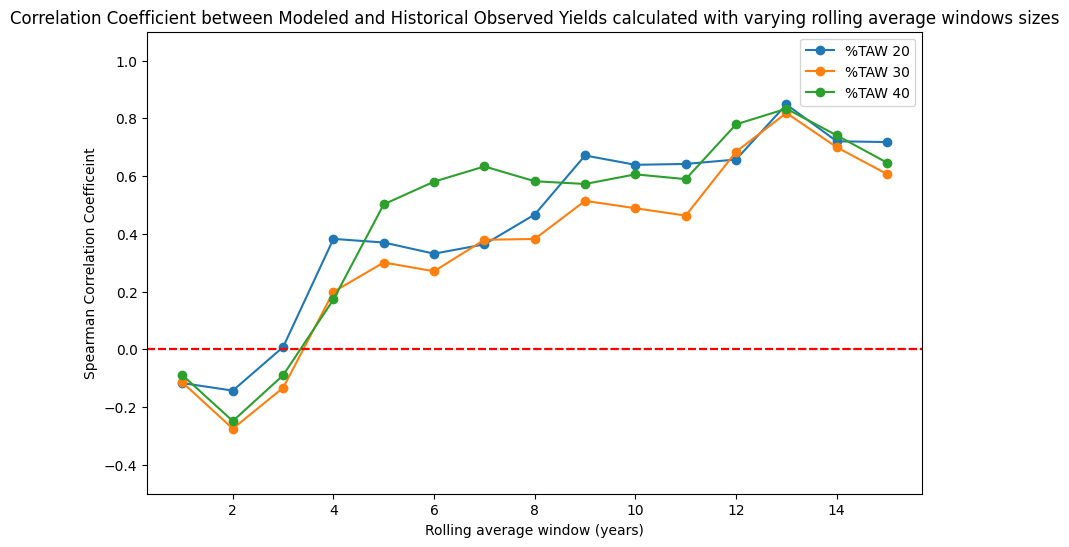

In [ ]:
plt.figure(figsize=(10,6))
for column_name in ScenarioI_Corr.columns:
 k=column_name
 plt.plot(ScenarioI_Corr.index, ScenarioI_Corr[column_name], label=column_name, marker='o')
 plt.axhline(y=0, color='r', linestyle='--')
 # Add labels and legend
 plt.title('Correlation Coefficient between Modeled and Historical Observed Yields calculated with varying rolling average windows sizes')
 plt.xlabel('Rolling average window (years)')
 plt.ylabel('Spearman Correlation Coefficeint')
 plt.ylim(-0.5, 1.1)
 plt.legend()

    # Display the plot
plt.show()

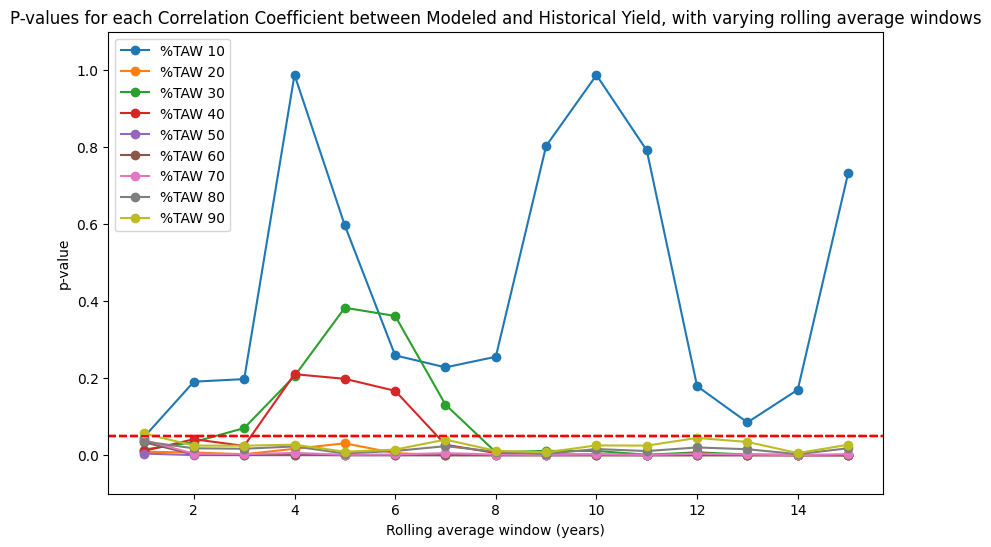

In [ ]:
plt.figure(figsize=(10,6))
for column_name in ScenarioI_Corr.columns:
 k=column_name
 plt.plot(p_values.index, p_values[column_name], label=column_name, marker='o')

 # Add labels and legend
 plt.title('P-values for each Correlation Coefficient between Modeled and Historical Yield, with varying rolling average windows')
 plt.xlabel('Rolling average window (years)')
 plt.ylabel('p-value')
 plt.axhline(y=0.05, color='r', linestyle='--')
 plt.ylim(-0.1, 1.1)
 plt.legend()

    # Display the plot
plt.show()

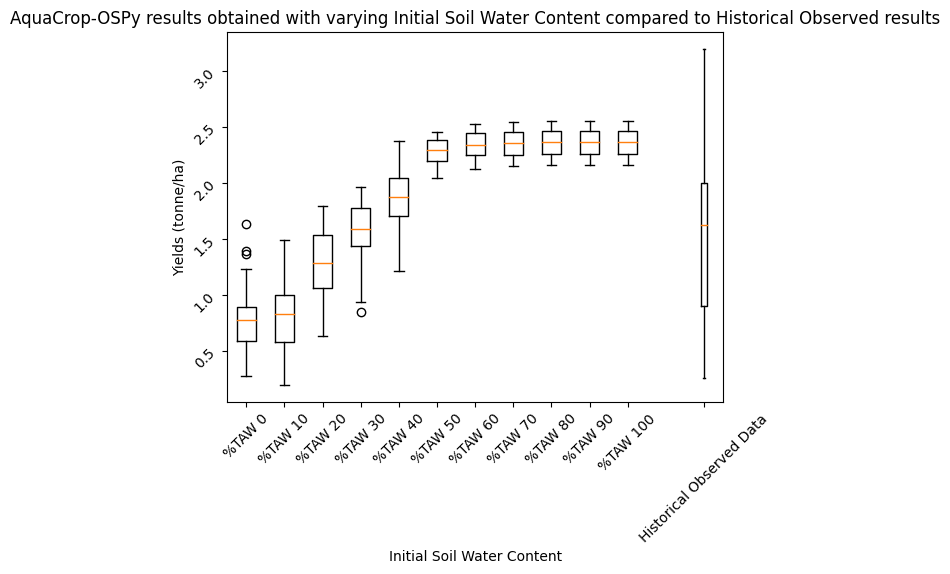

In [ ]:
data_to_plot = [ScenarioI[column] for column in ScenarioI.columns]

    # Create a figure and axis
fig, ax = plt.subplots()

    # Create a boxplot for each column in the DataFrame
ModeBox=ax.boxplot(data_to_plot, labels=ScenarioI.columns, positions=range(1, len(ScenarioI.columns) + 1))
HistoricalBox=ax.boxplot(statsAlm8019_Secano_df['Yield (tonne/ha)'].iloc[0:30], labels=['Historical Observed Data'], positions=range(len(ScenarioI.columns) + 2, len(ScenarioI.columns) + 3))

    # Set labels and title
ax.set_ylabel('Yields (tonne/ha)')
ax.set_xlabel('Initial Soil Water Content')
ax.set_title('AquaCrop-OSPy results obtained with varying Initial Soil Water Content compared to Historical Observed results')
ax.tick_params(labelsize=10, rotation=45)


# Show the plot
plt.show()


# 1. test for independence between values in historical yields through autocorrelation

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Example dataset (replace this with your data)
data = statsAlm8019_Secano_df['Yield (tonne/ha)']

# Perform the Ljung-Box test
results= sm.stats.diagnostic.acorr_ljungbox(data, lags=10)
# Interpret the results
alpha = 0.05  # Significance level
for i in range(0,len(results)):
  if results.iloc[i,1]< alpha:
    print(f"Significant autocorrelation detected at lags: {row}")
  else:
    print("No significant autocorrelation detected.")

#Now test if the differences have a normal distribution

In [ ]:
from scipy import stats
for column in ScenarioI.columns:
# Calculate the differences between the two datasets
 differences = ScenarioI[column]

# Perform the Shapiro-Wilk test for normality
 shapiro_test_statistic, shapiro_p_value = stats.shapiro(differences)
 print("Shapiro-Wilk Test:")
 print(f"Test Statistic: {shapiro_test_statistic}")
 print(f"P-Value: {shapiro_p_value}")

# Perform the Anderson-Darling test for normality
 anderson_test_statistic, anderson_critical_values, anderson_significance_levels = stats.anderson(differences)
 print("\nAnderson-Darling Test:")
 print(f"Test Statistic: {anderson_test_statistic}")
 print(f"Critical Values: {anderson_critical_values}")
 print(f"Significance Levels: {anderson_significance_levels}")

# Interpret the test results
 alpha = 0.05  # Significance level
 if shapiro_p_value > alpha:
    print("\nShapiro-Wilk test: Data looks normally distributed (fail to reject H0)")
 else:
    print("\nShapiro-Wilk test: Data does not look normally distributed (reject H0)")

 if anderson_test_statistic < anderson_critical_values[2]:
    print("Anderson-Darling test: Data looks normally distributed (fail to reject H0)")
 else:
    print("Anderson-Darling test: Data does not look normally distributed (reject H0)")


Shapiro-Wilk Test:
Test Statistic: 0.9703271985054016
P-Value: 0.5686028599739075

Anderson-Darling Test:
Test Statistic: 0.2023616236118002
Critical Values: [0.52  0.592 0.71  0.828 0.985]
Significance Levels: [15.  10.   5.   2.5  1. ]

Shapiro-Wilk test: Data looks normally distributed (fail to reject H0)
Anderson-Darling test: Data looks normally distributed (fail to reject H0)
Shapiro-Wilk Test:
Test Statistic: 0.9497812390327454
P-Value: 0.18066436052322388

Anderson-Darling Test:
Test Statistic: 0.41625721138510485
Critical Values: [0.52  0.592 0.71  0.828 0.985]
Significance Levels: [15.  10.   5.   2.5  1. ]

Shapiro-Wilk test: Data looks normally distributed (fail to reject H0)
Anderson-Darling test: Data looks normally distributed (fail to reject H0)
Shapiro-Wilk Test:
Test Statistic: 0.9037243127822876
P-Value: 0.012043887749314308

Anderson-Darling Test:
Test Statistic: 0.8838140873305953
Critical Values: [0.52  0.592 0.71  0.828 0.985]
Significance Levels: [15.  10.   5. 

they are all normally distributed, thus we can proceed to check wether they are symmetrical or not

In [ ]:
for column in ScenarioI.columns:
# Calculate the differences between the two datasets
 differences = statsAlm8019_Secano_df['Yield (tonne/ha)'] - ScenarioI[column]

# Perform the D'Agostino-Pearson test for symmetry
 k2, p = stats.normaltest(differences)
 print("D'Agostino-Pearson Test:")
 print(f"Test Statistic (k2): {k2}")
 print(f"P-Value: {p}")

# Interpret the test result
 alpha = 0.05  # Significance level
 if p > alpha:
    print("\nD'Agostino-Pearson test: Differences have a symmetric distribution (fail to reject H0)")
 else:
    print("\nD'Agostino-Pearson test: Differences do not have a symmetric distribution (reject H0)")



Now proceed with the Wilcoxon to test significance of similarity between datasets

In [ ]:
wilcoxon=pd.DataFrame()

for column in ScenarioI.columns:
# Perform the Wilcoxon signed-rank test
 statistic, p_value = stats.wilcoxon(statsAlm8019_Secano_df['Yield (tonne/ha)'] , ScenarioI[column])

# Print the test result

# Interpret the test result
 alpha = 0.05  # Significance level
 if p_value < alpha:
    wilcoxon=wilcoxon.append({'Result': ['Reject the null hypothesis: There is a significant difference between the paired samples.'],
        'stat':  statistic,
        'p-value':  p_value},ignore_index=True)
 else:
    wilcoxon=wilcoxon.append({'Result': ['Cannot Reject the null hypothesis: There is no significant difference between the paired samples.'],
        'stat':  statistic,
        'p-value':  p_value},ignore_index=True)

wilcoxon

# **Paired t-test**

In [ ]:
from scipy import stats
import random
import numpy as np
pairedt=pd.DataFrame()

for column in ScenarioI.columns:
# Perform the Wilcoxon signed-rank test
 #statistic, p_value = stats.ttest_rel(statsAlm8019_Secano_df['Yield (tonne/ha)'] , ScenarioI[column])
 statistic, p_value = stats.ttest_ind(statsAlm8019_Secano_df['Yield (tonne/ha)'] , ScenarioI[column],equal_var = False)

# Print the test result

# Interpret the test result
 alpha = 0.05  # Significance level
 if p_value < alpha:
    pairedt=pairedt.append({'Result': [''],
        'stat':  statistic,
        'p-value':  p_value},ignore_index=True)
 else:
    pairedt=pairedt.append({'Result': [''],
        'stat':  statistic,
        'p-value':  p_value},ignore_index=True)

pairedt

<ipython-input-24-1406c2678110>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pairedt=pairedt.append({'Result': [''],
<ipython-input-24-1406c2678110>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pairedt=pairedt.append({'Result': [''],
<ipython-input-24-1406c2678110>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pairedt=pairedt.append({'Result': [''],
<ipython-input-24-1406c2678110>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pairedt=pairedt.append({'Result': [''],
<ipython-input-24-1406c2678110>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

,Result,stat,p-value
0,[],4.944597,0.000015
1,[],4.421776,0.000081
2,[],1.738641,0.090279
3,[],-0.228223,0.820800
4,[],-2.230896,0.032492
5,[],-5.203171,0.000014
6,[],-5.580037,0.000005
7,[],-5.658719,0.000004
8,[],-5.708987,0.000003
9,[],-5.708985,0.000003


# **Chi squared test**

In [ ]:
from scipy.stats import chi2_contingency
chisquared=pd.DataFrame()
for column in ScenarioI.columns:
# Example contingency table
 observed_data = np.array([ScenarioI[column], statsAlm8019_Secano_df['Yield (tonne/ha)']])

# Perform the chi-squared test
 chi2, p, dof, expected = chi2_contingency(observed_data)

# Interpret the results
 if p < 0.05:
    chisquared=chisquared.append({'Result': ["There is a significant relationship between the variables."],
        'p-value':  p},ignore_index=True)
 else:
    chisquared=chisquared.append({'Result': ["There is no significant relationship between the variables."],
        'p-value':  p},ignore_index=True)

chisquared

# **Plotting the rolling averages to see how well the trends are followed**

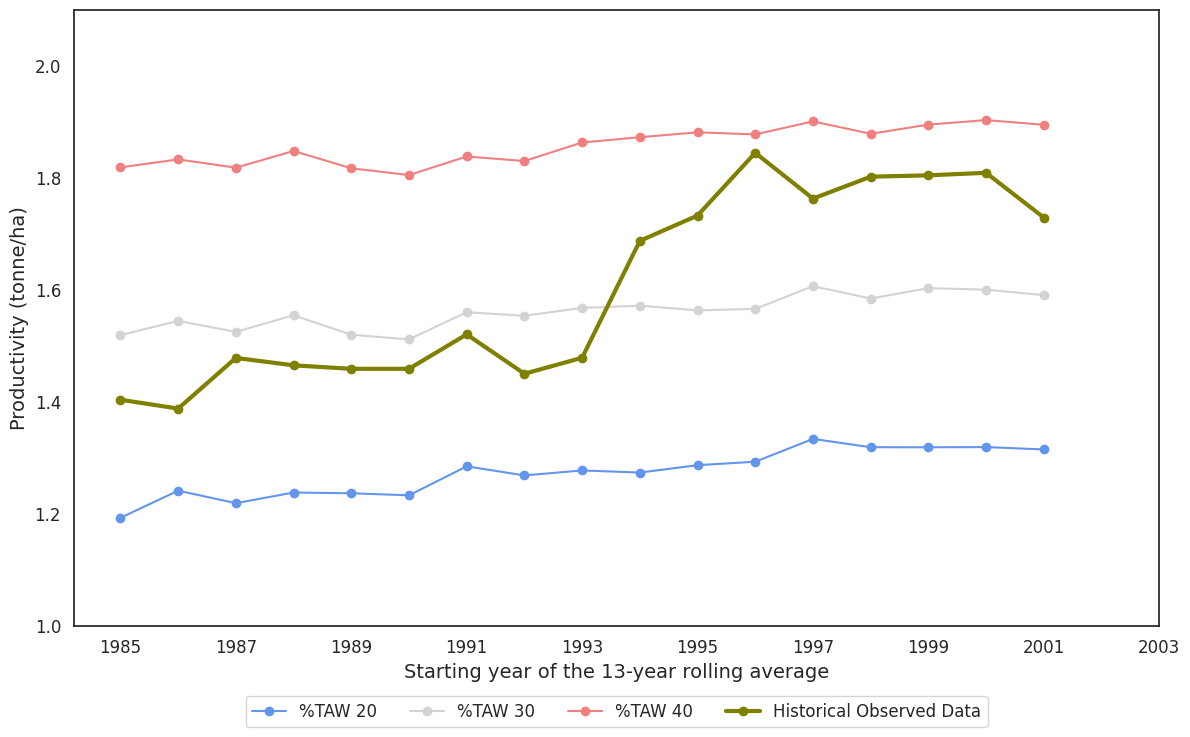

In [28]:
sns.set_theme(style="white")
time=13;
AveragedModels=rolling_averages(ScenarioI, time)
AveragedHistorical=rolling_averages(statsAlm8019_Secano_df, time)
#AverageSYRS=rolling_averages(SYRS, 20)
plt.figure(figsize=(14,8))
palette=['cornflowerblue', 'lightgrey', 'lightcoral']
i=0
for column_name in ScenarioI.columns:
 k=column_name
 plt.plot([x for x in range (1985,2002)], AveragedModels[column_name], color=palette[i],label=column_name, marker='o')
 i=i+1

plt.plot([x for x in range (1985,2002)], AveragedHistorical['Yield (tonne/ha)'], label='Historical Observed Data', color = 'olive', marker='o', linewidth=3)
 # Add labels and legend
#plt.title(f"{time} years rolling averaged productivities. Modeled vs Historical Observed", font)
plt.xlabel('Starting year of the 13-year rolling average', fontsize=14)
plt.ylabel('Productivity (tonne/ha)', fontsize=14)
#x_ticks = np.arange(1985, 2005, 2)
plt.xticks(x_ticks, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(1, 2.1)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, fontsize='12')
plt.show()

From this analysis the good values appear to be close to

# **Checking behaviour for different time windows of rolling average**

In [ ]:
boxplotaverages(ScenarioI['% WC 40'], [x for x in range (1,30,5)]),boxplotaverages(ScenarioI['% WC 30'], [x for x in range (1,30,5)]),boxplotaverages(ScenarioI['% WC 20'], [x for x in range (1,30,5)])



KeyboardInterrupt



# **Scenario 2**

Fixed Initia Water Content, and changing plating date

In [ ]:
from datetime import datetime, timedelta

# Define the start and end dates
start_date = datetime(1985, 10, 15)
end_date = datetime(1985, 12, 15)
# Define the increment (e.g., one day)
increment = timedelta(days=5)
# Initialize the current date as the start date
current_date = start_date
# Createan empty list to store the dates
dates_list = []
# Loop through the dates and store them in MM/DD format
while current_date <= end_date:
    mm_dd_date = current_date.strftime('%m/%d')
    dates_list.append(mm_dd_date)
    current_date += increment


ScenarioII=pd.DataFrame()
for k in range(0, len(dates_list)):

 InitWC=InitialWaterContent(wc_type='Pct',value=[20])
 p_date=dates_list[k]

 column_name = dates_list[k]  # Generate a unique column name
 results =  sensitivity_analysis_Models(p_date, InitWC, '/content/ACCESS_CM2.txt','/content/CNRM_ESM2_1.txt','/content/EC_Earth3_Veg_LR.txt', '/content/HadGEM3_GC31_LL.txt','/content/IPSL_CM6A_LR.txt','/content/MIROC6.txt','/content/NorESM2_MM.txt')
 ScenarioII[column_name] = results

In [ ]:
csv_filename = 'Sens_date_20.csv'
ScenarioII.to_csv(csv_filename, index=False)

In [ ]:
ScenarioII_Corr=corr_coeff(ScenarioII, statsAlm8019_Secano_df)

In [ ]:
plt.figure(figsize=(10,6))
for column_name in ScenarioII_Corr.columns:
 k=column_name
 plt.plot(ScenarioII_Corr.index, ScenarioII_Corr[column_name], label=column_name, marker='o')

 # Add labels and legend
 plt.xlabel('rolling average window (Years)')
 plt.ylabel('Corr_coeff')
 plt.legend()

    # Display the plot
plt.show()

In [ ]:
data_to_plot = [ScenarioII[column] for column in ScenarioII.columns]

    # Create a figure and axis
fig, ax = plt.subplots()

    # Create a boxplot for each column in the DataFrame
ModeBox=ax.boxplot(data_to_plot, labels=ScenarioII.columns, positions=range(1, len(ScenarioII.columns) + 1))
HistoricalBox=ax.boxplot(statsAlm8019_Secano_df['Yield (tonne/ha)'].iloc[1:30], labels=['Historical'], positions=range(len(ScenarioII.columns) + 2, len(ScenarioII.columns) + 3))

    # Set labels and title
ax.set_ylabel('Yields (tonne/ha)')
ax.set_xlabel('Planting Date')
ax.set_title('Sensitivity Analysis of Planting date. Initial Water Content: 20% TAW')
ax.tick_params(labelsize=10, rotation=45)


# Show the plot
plt.show()


In [ ]:
#paired t-test

for column in ScenarioII.columns:
# Perform the Wilcoxon signed-rank test
 statistic, p_value = stats.ttest_ind(statsAlm8019_Secano_df['Yield (tonne/ha)'] , ScenarioII[column],equal_var = False)


# Print the test result

# Interpret the test result
 alpha = 0.05  # Significance level
 if p_value < alpha:
    pairedt=pairedt.append({'Result': [''],
        'stat':  statistic,
        'p-value':  p_value},ignore_index=True)
 else:
    pairedt=pairedt.append({'Result': [''],
        'stat':  statistic,
        'p-value':  p_value},ignore_index=True)

pairedt

# **While the planting date does not have much impact, Initial Soil Water Content does**

Let's check the correlation between Historical and modeled data, and Climatic data


In [ ]:
CorrelatioModeled=Climate_Yield('/content/Almeria8019Agri4Cast.txt', ScenarioI['% WC 50'])
CorrelatioHistorical=Climate_Yield('/content/Almeria8019Agri4Cast.txt', statsAlm8019_Secano_df['Yield (tonne/ha)'])

In [ ]:
CorrelatioModeled,CorrelatioHistorical

# **Correlate with Climatic variables Modeled data with different soil water contents with different soil water contents**

Precipitation

In [ ]:
window=[x for x in range(1,25)]
Mod_Prec=calculate_rolling_correlations( '/content/ACCESS_CM2.txt','/content/CNRM_ESM2_1.txt','/content/EC_Earth3_Veg_LR.txt', '/content/HadGEM3_GC31_LL.txt','/content/IPSL_CM6A_LR.txt','/content/MIROC6.txt','/content/NorESM2_MM.txt', ScenarioI, 'Prcp(mm)',window )
Hist_Prec=calculate_rolling_correlations( '/content/ACCESS_CM2.txt','/content/CNRM_ESM2_1.txt','/content/EC_Earth3_Veg_LR.txt', '/content/HadGEM3_GC31_LL.txt','/content/IPSL_CM6A_LR.txt','/content/MIROC6.txt','/content/NorESM2_MM.txt', statsAlm8019_Secano_df, 'Prcp(mm)',window )

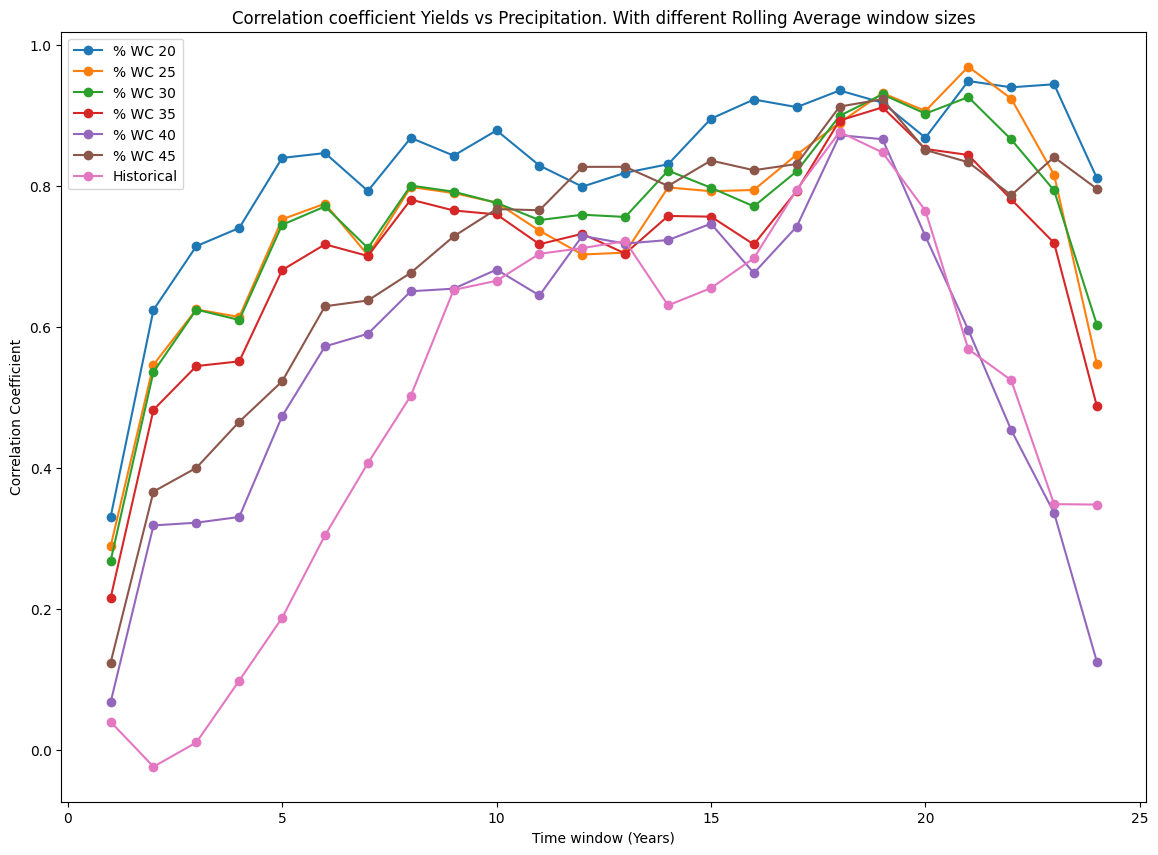

In [ ]:
plt.figure(figsize=(14,10))
for column_name in Mod_Prec.columns:
 k=column_name
 plt.plot(Mod_Prec.index, Mod_Prec[column_name], label=column_name, marker='o')

plt.plot(Mod_Prec.index, Hist_Prec['Yield (tonne/ha)'], label='Historical',marker='o')
 # Add labels and legend
plt.xlabel('Time window (Years)')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation coefficient Yields vs Precipitation. With different Rolling Average window sizes')
plt.legend()
plt.show()

Maximum Temperature

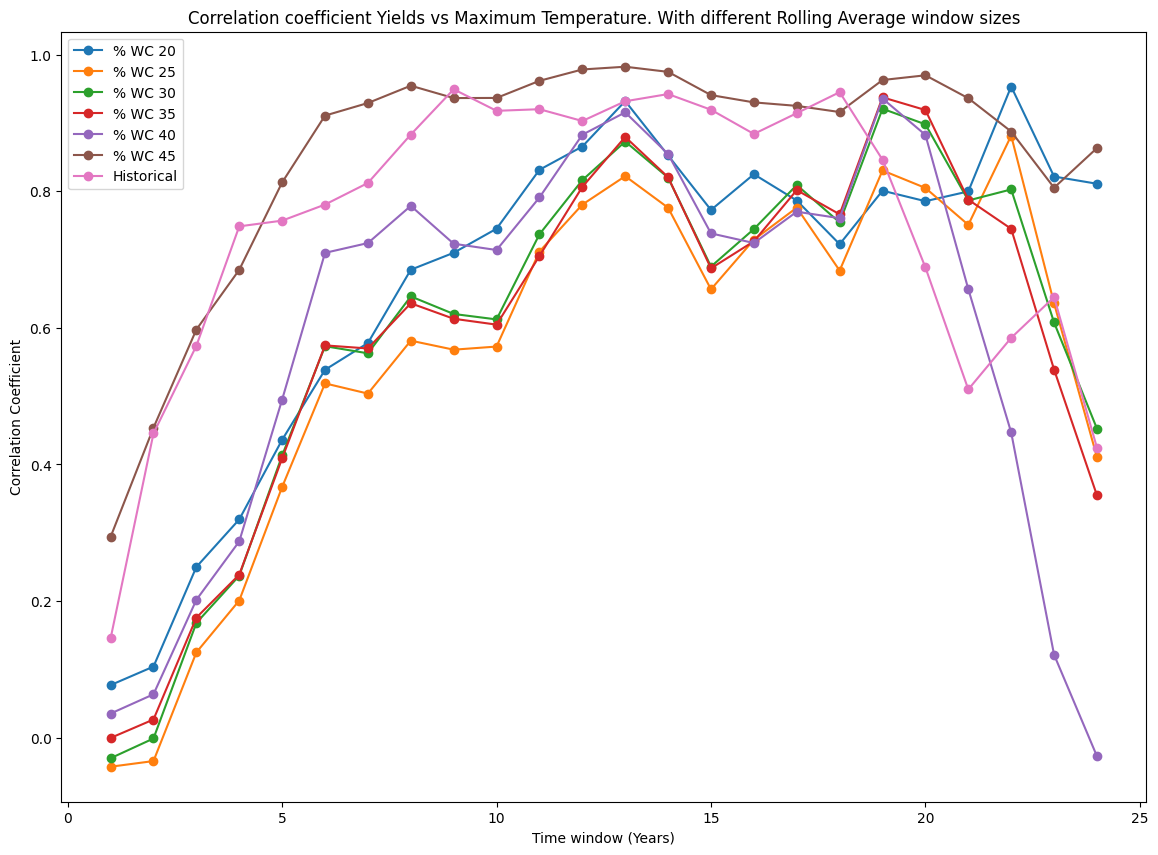

In [ ]:
Mod_Tmax=calculate_rolling_correlations( '/content/ACCESS_CM2.txt','/content/CNRM_ESM2_1.txt','/content/EC_Earth3_Veg_LR.txt', '/content/HadGEM3_GC31_LL.txt','/content/IPSL_CM6A_LR.txt','/content/MIROC6.txt','/content/NorESM2_MM.txt', ScenarioI, 'Tmax(C)',window )
Hist_Tmax=calculate_rolling_correlations( '/content/ACCESS_CM2.txt','/content/CNRM_ESM2_1.txt','/content/EC_Earth3_Veg_LR.txt', '/content/HadGEM3_GC31_LL.txt','/content/IPSL_CM6A_LR.txt','/content/MIROC6.txt','/content/NorESM2_MM.txt', statsAlm8019_Secano_df, 'Tmax(C)',window )
plt.figure(figsize=(14,10))
for column_name in Mod_Tmax.columns:
 k=column_name
 plt.plot(Mod_Tmax.index, Mod_Tmax[column_name], label=column_name, marker='o')



plt.plot(Hist_Tmax.index, Hist_Tmax['Yield (tonne/ha)'], label='Historical',marker='o')
 # Add labels and legend
plt.xlabel('Time window (Years)')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation coefficient Yields vs Maximum Temperature. With different Rolling Average window sizes')
plt.legend()
plt.show()

Minimum Temperature

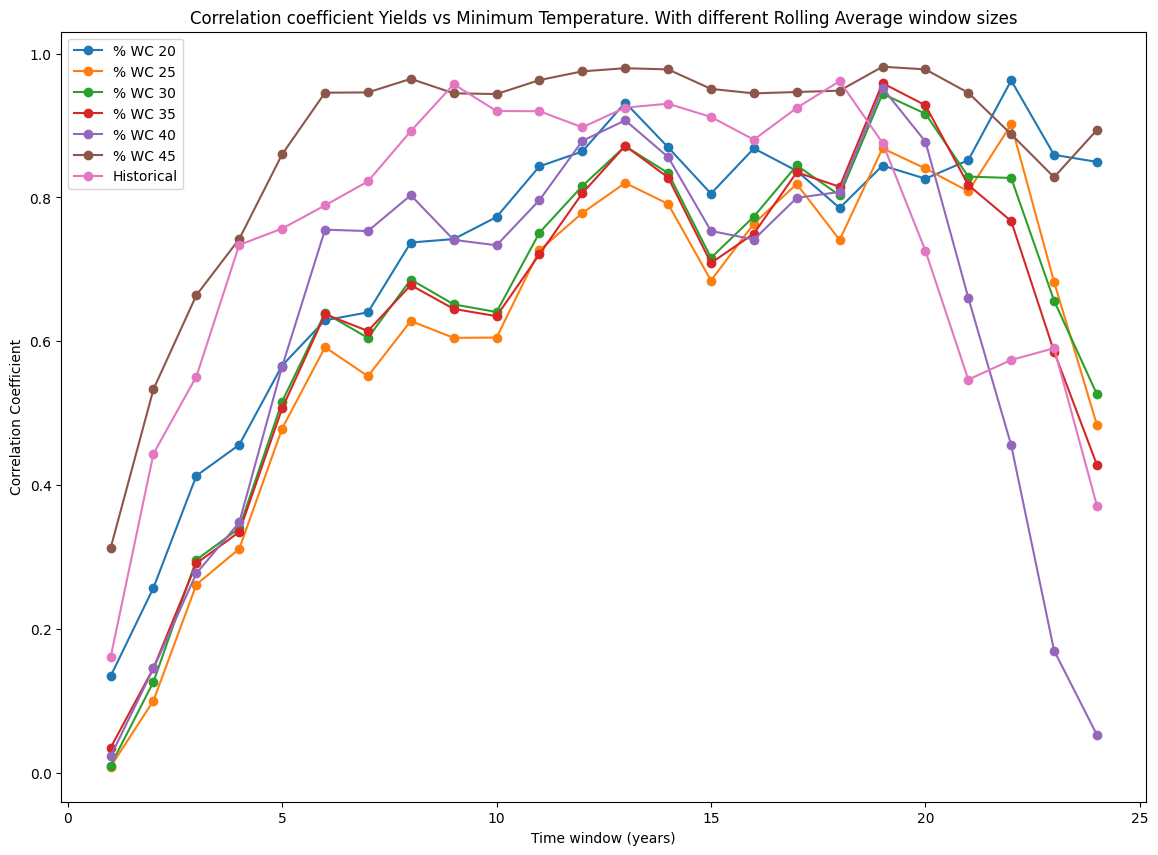

In [ ]:
Mod_Tmin=calculate_rolling_correlations( '/content/ACCESS_CM2.txt','/content/CNRM_ESM2_1.txt','/content/EC_Earth3_Veg_LR.txt', '/content/HadGEM3_GC31_LL.txt','/content/IPSL_CM6A_LR.txt','/content/MIROC6.txt','/content/NorESM2_MM.txt', ScenarioI, 'Tmin(C)',window )
Hist_Tmin=calculate_rolling_correlations( '/content/ACCESS_CM2.txt','/content/CNRM_ESM2_1.txt','/content/EC_Earth3_Veg_LR.txt', '/content/HadGEM3_GC31_LL.txt','/content/IPSL_CM6A_LR.txt','/content/MIROC6.txt','/content/NorESM2_MM.txt', statsAlm8019_Secano_df, 'Tmin(C)',window )
plt.figure(figsize=(14,10))
for column_name in Mod_Tmin.columns:
 k=column_name
 plt.plot(Mod_Tmin.index, Mod_Tmin[column_name], label=column_name, marker='o')



plt.plot(Hist_Tmin.index, Hist_Tmin['Yield (tonne/ha)'], label='Historical', marker='o')
 # Add labels and legend
plt.xlabel('Time window (years)')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation coefficient Yields vs Minimum Temperature. With different Rolling Average window sizes')
plt.legend()
plt.show()

Potential Evapotranspirtion

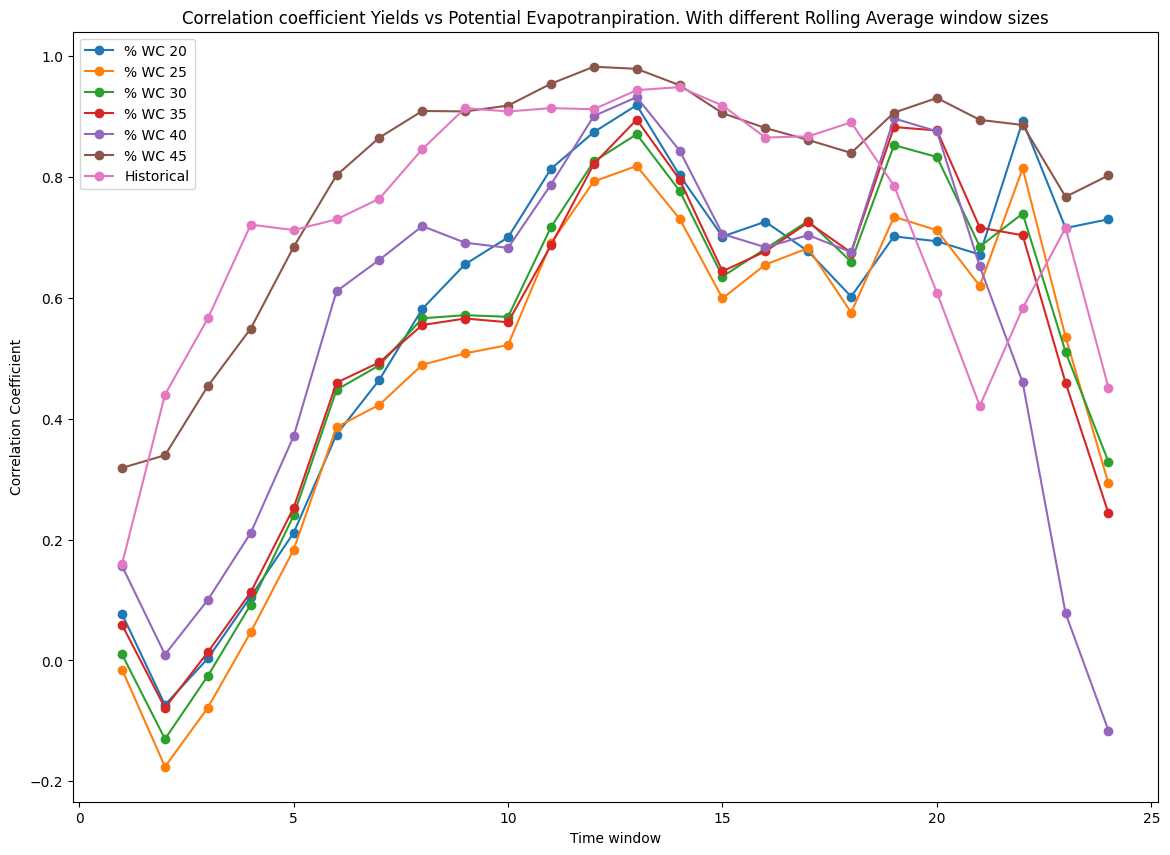

In [ ]:
Mod_ET0=calculate_rolling_correlations( '/content/ACCESS_CM2.txt','/content/CNRM_ESM2_1.txt','/content/EC_Earth3_Veg_LR.txt', '/content/HadGEM3_GC31_LL.txt','/content/IPSL_CM6A_LR.txt','/content/MIROC6.txt','/content/NorESM2_MM.txt', ScenarioI, 'Et0(mm)',window )
Hist_ET0=calculate_rolling_correlations( '/content/ACCESS_CM2.txt','/content/CNRM_ESM2_1.txt','/content/EC_Earth3_Veg_LR.txt', '/content/HadGEM3_GC31_LL.txt','/content/IPSL_CM6A_LR.txt','/content/MIROC6.txt','/content/NorESM2_MM.txt', statsAlm8019_Secano_df, 'Et0(mm)',window )
plt.figure(figsize=(14,10))
for column_name in Mod_ET0.columns:
 k=column_name
 plt.plot(Mod_ET0.index, Mod_ET0[column_name], label=column_name, marker='o')



plt.plot(Hist_ET0.index, Hist_ET0['Yield (tonne/ha)'], label='Historical', marker='o')
 # Add labels and legend
plt.xlabel('Time window')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation coefficient Yields vs Potential Evapotranpiration. With different Rolling Average window sizes')
plt.legend()
plt.show()

# **It Looks like 30% might be a good initial value for Initial Water Content, however lets remember that precision is not a primary objective. This value is choosen uniquely because it has good correlation values and good mean modelling. Show sensitivity analysis to show that all the other options would have been okay anyways.**

Everything with 45%

In [ ]:
 InitWC=InitialWaterContent(wc_type='Pct', value=[30])
 p_date='11/10'

 column_name = f'% WC {30}'  # Generate a unique column name
 results45_Models= pd.DataFrame(sensitivity_analysis_Models(p_date, InitWC,'/content/ACCESS_CM2.txt','/content/CNRM_ESM2_1.txt','/content/EC_Earth3_Veg_LR.txt', '/content/HadGEM3_GC31_LL.txt','/content/IPSL_CM6A_LR.txt','/content/MIROC6.txt','/content/NorESM2_MM.txt'))



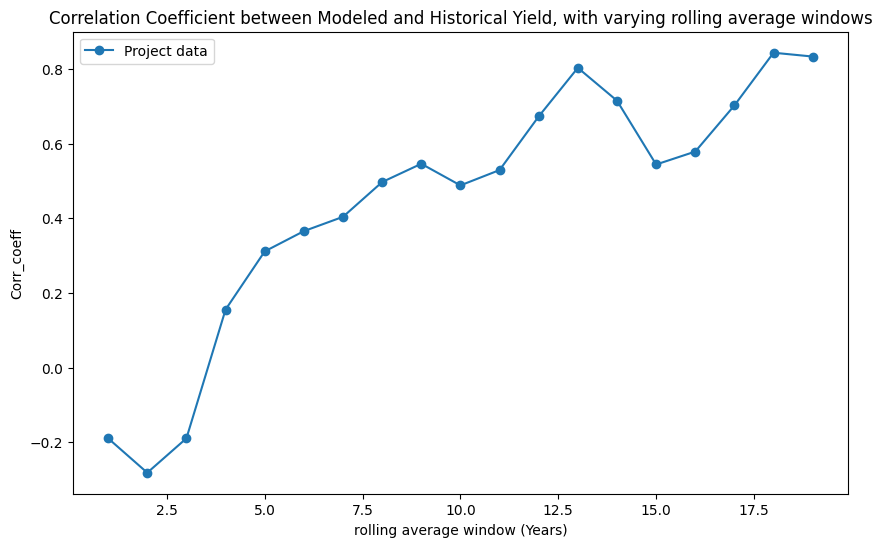

In [ ]:
 results45_Models_Corr=corr_coeff(results45_Models, statsAlm8019_Secano_df)

 plt.figure(figsize=(10,6))

 plt.plot(results45_Models_Corr.index, results45_Models_Corr, label='Project data', marker='o')
 # Add labels and legend
 plt.title('Correlation Coefficient between Modeled and Historical Yield, with varying rolling average windows')
 plt.xlabel('rolling average window (Years)')
 plt.ylabel('Corr_coeff')
 plt.legend()

    # Display the plot
plt.show()

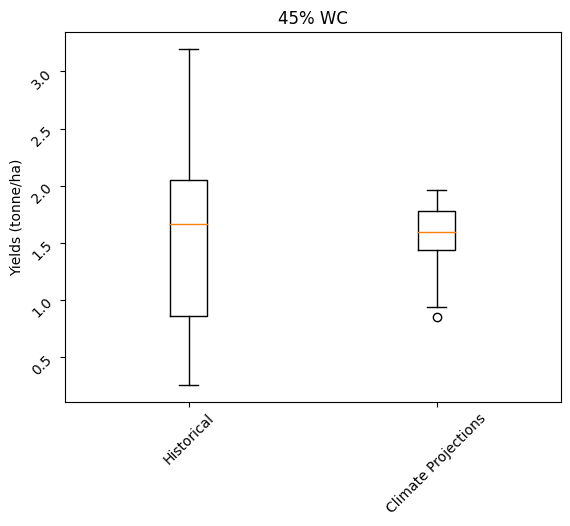

In [ ]:

    # Create a figure and axis
fig, ax = plt.subplots()

    # Create a boxplot for each column in the DataFrame
HistoricalBox=ax.boxplot(statsAlm8019_Secano_df['Yield (tonne/ha)'].iloc[1:30], labels=['Historical'], positions=range(2,3))
HistoricalBox=ax.boxplot(results45_Models['Yield (tonne/ha)'], labels=['Climate Projections'], positions=range(3,4))
    # Set labels and title
ax.set_ylabel('Yields (tonne/ha)')
ax.set_title('45% WC')
ax.tick_params(labelsize=10, rotation=45)


# Show the plot
plt.show()

# **T test to evaluate the significance of the results**

In [ ]:
paired_t_test(statsAlm8019_Secano_df['Yield (tonne/ha)'], results45_Models['Yield (tonne/ha)'])

(-0.5992571104552599, 0.553819766860655)

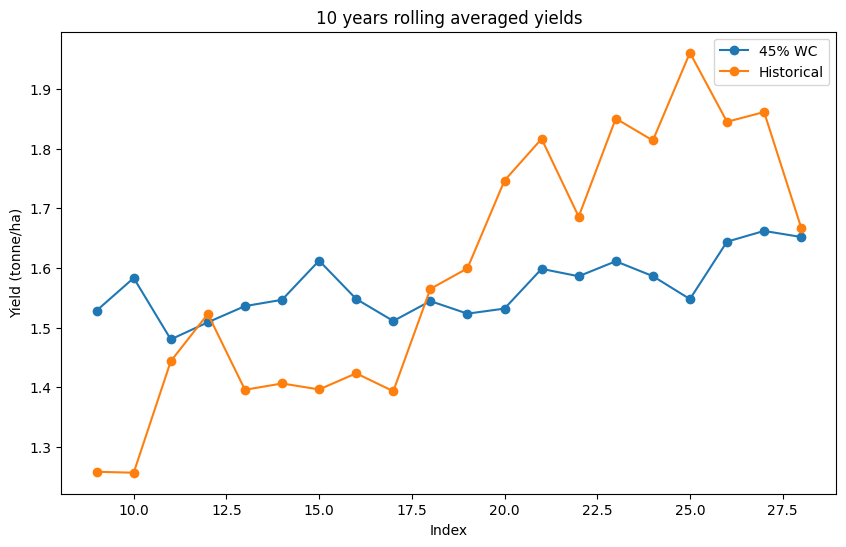

In [ ]:
time=10;
AveragedModels=rolling_averages(results45_Models, time)
AveragedHistorical=rolling_averages(statsAlm8019_Secano_df, time)
AverageSYRS=rolling_averages(SYRS, 20)
plt.figure(figsize=(10,6))

plt.plot(AveragedModels.index, AveragedModels, label='45% WC', marker='o')


plt.plot(AveragedHistorical.index, AveragedHistorical['Yield (tonne/ha)'], label='Historical', marker='o')
 # Add labels and legend
plt.title(f"{time} years rolling averaged yields")
plt.xlabel('Index')
plt.ylabel('Yield (tonne/ha)')
plt.legend()
plt.show()

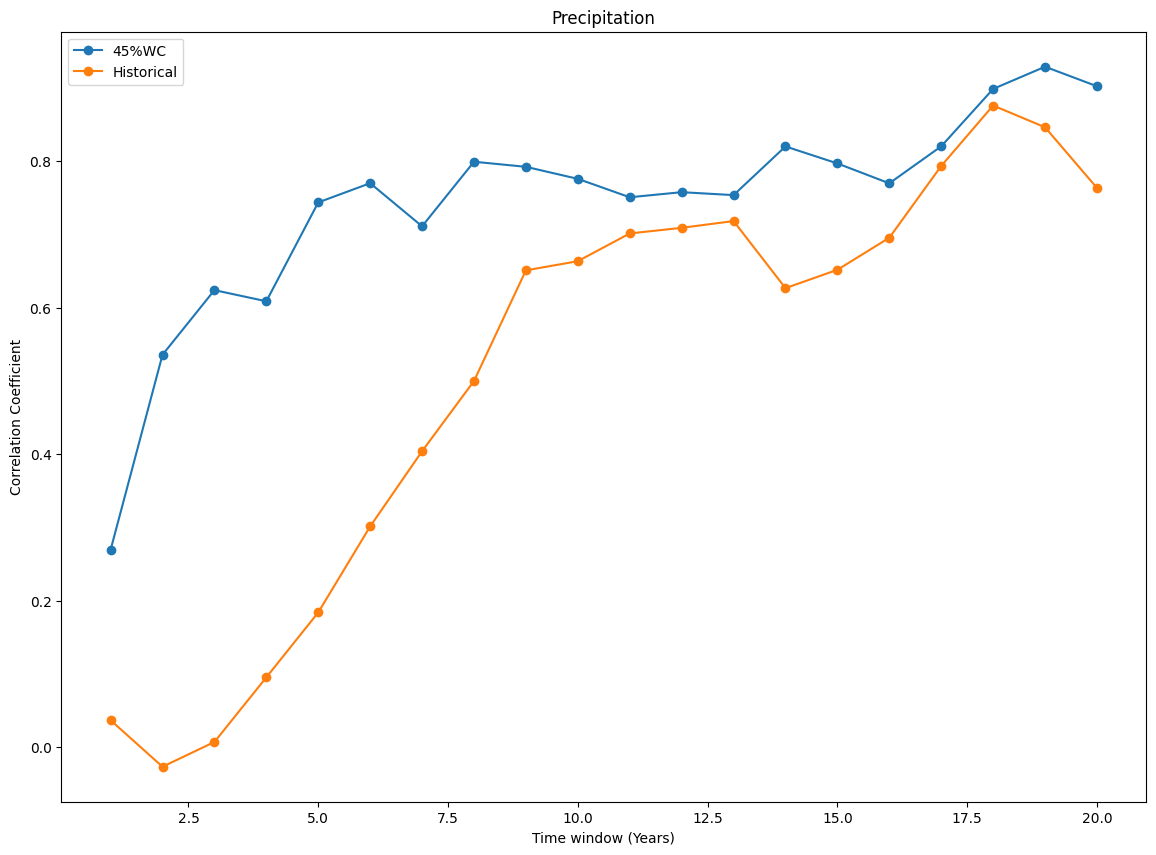

In [ ]:
window=[x for x in range(1,21)]
Mod_Prec=calculate_rolling_correlations( '/content/ACCESS_CM2.txt','/content/CNRM_ESM2_1.txt','/content/EC_Earth3_Veg_LR.txt', '/content/HadGEM3_GC31_LL.txt','/content/IPSL_CM6A_LR.txt','/content/MIROC6.txt','/content/NorESM2_MM.txt', results45_Models, 'Prcp(mm)',window )
Hist_Prec=calculate_rolling_correlations('/content/ACCESS_CM2.txt','/content/CNRM_ESM2_1.txt','/content/EC_Earth3_Veg_LR.txt', '/content/HadGEM3_GC31_LL.txt','/content/IPSL_CM6A_LR.txt','/content/MIROC6.txt','/content/NorESM2_MM.txt', statsAlm8019_Secano_df, 'Prcp(mm)',window )

plt.figure(figsize=(14,10))

plt.plot(Mod_Prec.index, Mod_Prec, label='45%WC', marker='o')
plt.plot(Hist_Prec.index, Hist_Prec['Yield (tonne/ha)'], label='Historical',marker='o')
 # Add labels and legend
plt.xlabel('Time window (Years)')
plt.ylabel('Correlation Coefficient')
plt.title('Precipitation')
plt.legend()
plt.show()

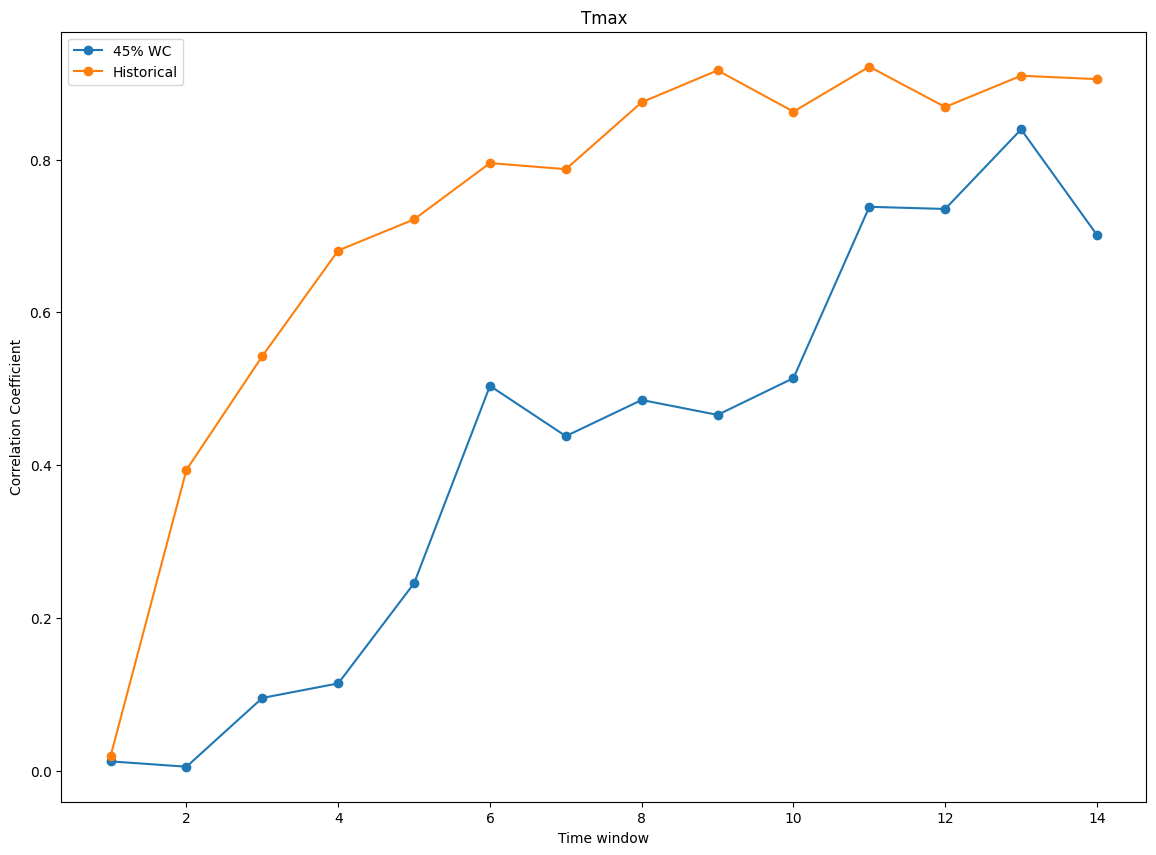

In [ ]:
Mod_Tmax=calculate_rolling_correlations('/content/ACCESS_CM2.txt','/content/CNRM_ESM2_1.txt','/content/EC_Earth3_Veg_LR.txt', '/content/HadGEM3_GC31_LL.txt','/content/IPSL_CM6A_LR.txt','/content/MIROC6.txt','/content/NorESM2_MM.txt', results45_Models, 'Tmax(C)',window )
Hist_Tmax=calculate_rolling_correlations('/content/ACCESS_CM2.txt','/content/CNRM_ESM2_1.txt','/content/EC_Earth3_Veg_LR.txt', '/content/HadGEM3_GC31_LL.txt','/content/IPSL_CM6A_LR.txt','/content/MIROC6.txt','/content/NorESM2_MM.txt', statsAlm8019_Secano_df, 'Tmax(C)',window )
plt.figure(figsize=(14,10))
plt.plot(Mod_Tmax.index, Mod_Tmax, label='45% WC', marker='o')

plt.plot(Hist_Tmax.index, Hist_Tmax['Yield (tonne/ha)'], label='Historical',marker='o')
 # Add labels and legend
plt.xlabel('Time window')
plt.ylabel('Correlation Coefficient')
plt.title('Tmax')
plt.legend()
plt.show()

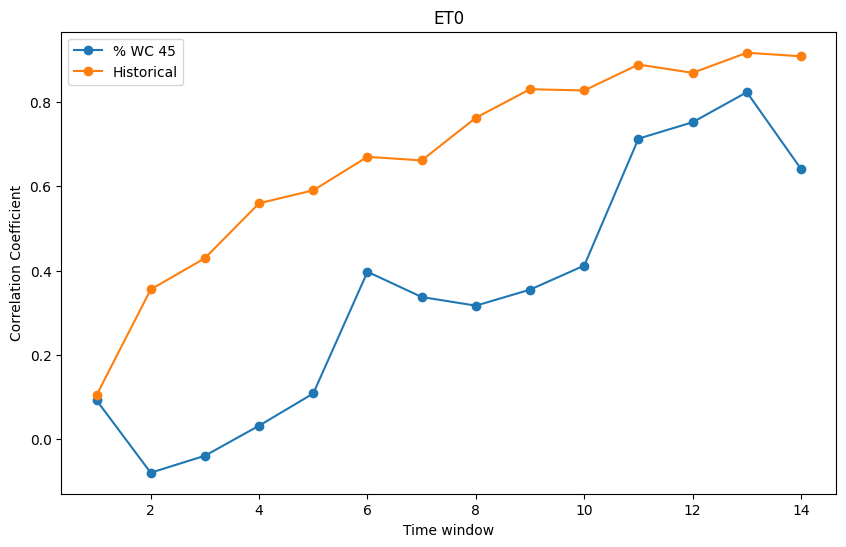

In [ ]:
Mod_ET0=calculate_rolling_correlations('/content/ACCESS_CM2.txt','/content/CNRM_ESM2_1.txt','/content/EC_Earth3_Veg_LR.txt', '/content/HadGEM3_GC31_LL.txt','/content/IPSL_CM6A_LR.txt','/content/MIROC6.txt','/content/NorESM2_MM.txt', results45_Models, 'Et0(mm)',window )
Hist_ET0=calculate_rolling_correlations('/content/ACCESS_CM2.txt','/content/CNRM_ESM2_1.txt','/content/EC_Earth3_Veg_LR.txt', '/content/HadGEM3_GC31_LL.txt','/content/IPSL_CM6A_LR.txt','/content/MIROC6.txt','/content/NorESM2_MM.txt', statsAlm8019_Secano_df, 'Et0(mm)',window )
plt.figure(figsize=(10,6))
plt.plot(Mod_ET0.index, Mod_ET0, label=column_name, marker='o')
plt.plot(Hist_ET0.index, Hist_ET0['Yield (tonne/ha)'], label='Historical',marker='o')
 # Add labels and legend
plt.xlabel('Time window')
plt.ylabel('Correlation Coefficient')
plt.title('ET0')
plt.legend()
plt.show()

# **Statistical analysis for Validation**
Based on the parameters from https://www.sciencedirect.com/science/article/pii/S0308521X1300070X#b0255

**RMSE**

<ipython-input-72-1432e51af23a>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_df=rmse_df.append({'RMSE': rmse}, ignore_index=True)
<ipython-input-72-1432e51af23a>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_df=rmse_df.append({'RMSE': rmse}, ignore_index=True)
<ipython-input-72-1432e51af23a>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_df=rmse_df.append({'RMSE': rmse}, ignore_index=True)
<ipython-input-72-1432e51af23a>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_df=rmse_df.append({'RMSE': rmse}, ignore_index=True)
<ipython-input-72-1432e51af23a>:18: FutureWarning: The frame.append method is deprec

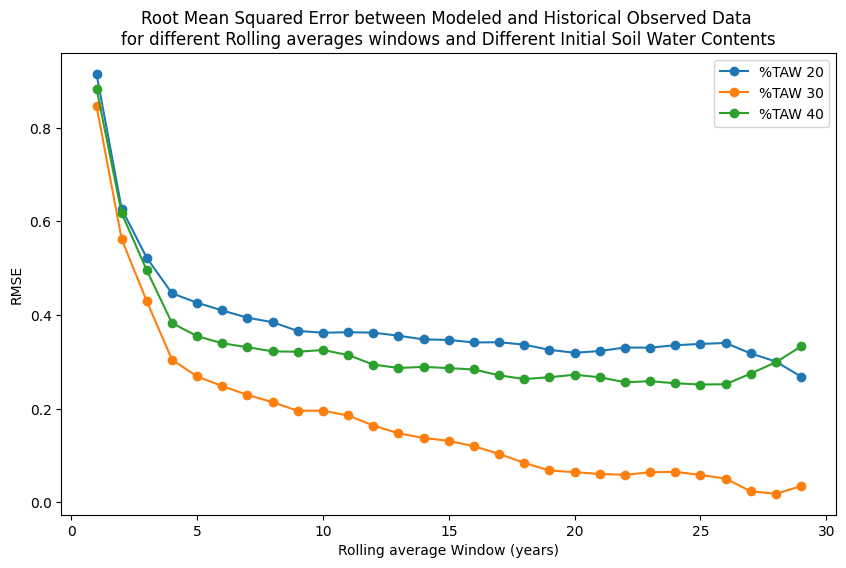

In [ ]:

#How does the RMSE evolve with different rolling averge windows
rmse_df=pd.DataFrame(columns=['RMSE'])
rrmse_df=pd.DataFrame(columns=['rRMSE'])
from sklearn.metrics import mean_squared_error
from math import sqrt
plt.figure(figsize=(10,6))

summaryRMSE_df=pd.DataFrame()
for column in ScenarioI.columns:
 results45_Models=pd.DataFrame(ScenarioI[column])

 for t in range(1,30):
# Calculate mean squared error (MSE)
  AveragedModels=rolling_averages(results45_Models, t)
  AveragedHistorical=rolling_averages(statsAlm8019_Secano_df, t)
  mse = mean_squared_error(AveragedHistorical['Yield (tonne/ha)'], AveragedModels)
  rmse = sqrt(mse)
  rmse_df=rmse_df.append({'RMSE': rmse}, ignore_index=True)

 summaryRMSE_df[column] = rmse_df['RMSE'].tolist()
 plt.plot([x for x in range(1,30)], rmse_df['RMSE'], label=column, marker='o')


 rmse_df = rmse_df.drop(rmse_df.index, axis=0)  # Remove all rows (axis=0)
 rmse_df = rmse_df.drop(rmse_df.columns, axis=1)  # Remove all columns (axis=1)
 # Add labels and legend

rmse_df.to_csv('RMSE', index=False )
plt.title(f"Root Mean Squared Error between Modeled and Historical Observed Data \nfor different Rolling averages windows and Different Initial Soil Water Contents")
plt.xlabel('Rolling average Window (years)')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [ ]:
summaryRMSE_df.to_csv('RMSE.csv',index=False)

<ipython-input-79-2688191b7d20>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rrmse_df=rrmse_df.append({'rRMSE': rrmse['Yield (tonne/ha)']}, ignore_index=True)
<ipython-input-79-2688191b7d20>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rrmse_df=rrmse_df.append({'rRMSE': rrmse['Yield (tonne/ha)']}, ignore_index=True)
<ipython-input-79-2688191b7d20>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rrmse_df=rrmse_df.append({'rRMSE': rrmse['Yield (tonne/ha)']}, ignore_index=True)
<ipython-input-79-2688191b7d20>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rrmse_df=rrmse_df.append({'rRMSE': rrmse['Yield (tonne/ha)']}, ignore_

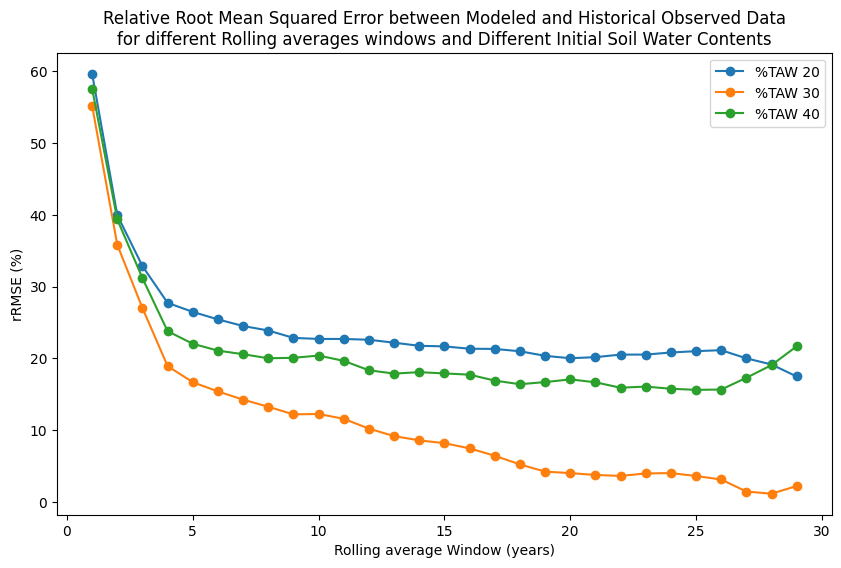

In [ ]:
#How does the RMSE evolve with different rolling averge windows
rrmse_df=pd.DataFrame(columns=['rRMSE'])
from sklearn.metrics import mean_squared_error
from math import sqrt
plt.figure(figsize=(10,6))

summary_df = pd.DataFrame()

for column in ScenarioI.columns:
 results45_Models=pd.DataFrame(ScenarioI[column])

 for t in range(1,30):
# Calculate mean squared error (MSE)
  AveragedModels=rolling_averages(results45_Models, t)
  AveragedHistorical=rolling_averages(statsAlm8019_Secano_df, t)
  mse = mean_squared_error(AveragedHistorical['Yield (tonne/ha)'], AveragedModels)
  rmse = sqrt(mse)
  rrmse=(rmse/AveragedHistorical.mean())*100
  rrmse_df=rrmse_df.append({'rRMSE': rrmse['Yield (tonne/ha)']}, ignore_index=True)

 summary_df[column] = rrmse_df['rRMSE'].tolist()

 plt.plot([x for x in range(1,30)], rrmse_df['rRMSE'], label=column, marker='o')
 rrmse_df = rrmse_df.drop(rrmse_df.index, axis=0)  # Remove all rows (axis=0)
 rrmsemse_df = rrmse_df.drop(rrmse_df.columns, axis=1)  # Remove all columns (axis=1)
 # Add labels and legend

rmse_df.to_csv('RMSE', index=False )
plt.title(f"Relative Root Mean Squared Error between Modeled and Historical Observed Data\nfor different Rolling averages windows and Different Initial Soil Water Contents")
plt.xlabel('Rolling average Window (years)')
plt.ylabel('rRMSE (%)')
plt.legend()
plt.show()

In [ ]:
summary_df

,%TAW 20,%TAW 30,%TAW 40
0,59.604201,55.157428,57.540825
1,39.923625,35.805924,39.331377
2,32.833790,27.004900,31.158524
3,27.728205,18.925821,23.783815
4,26.467145,16.688470,22.033924
5,25.424789,15.400890,21.079450
6,24.505173,14.260112,20.581957
7,23.879549,13.271717,20.016661
8,22.852596,12.209264,20.081415
9,22.705827,12.265838,20.391659


In [ ]:
summary_df.to_csv('rRMSE.csv', index=False)

KeyError: ignored

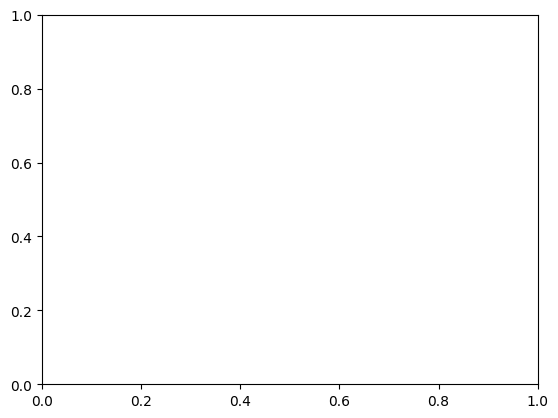

In [ ]:
fig, ax1 = plt.subplots()

# Plot the first data on the first y-axis
ax1.plot([x for x in range(1,30)], rmse_df['RMSE'], label=column, marker='o')
ax1.set_xlabel('Rolling average Window size')
ax1.set_ylabel('RMSE', color='b')
#ax1.tick_params('y', colors='b')

# Create the second y-axis
ax2 = ax1.twinx()

# Plot the second data on the second y-axis
ax2.plot([x for x in range(1,30)], rrmse_df['rRMSE'], label=column, marker='o')
ax2.set_ylabel('rRMSE', color='r')
#ax2.tick_params('y', colors='r')

# Add a legend
ax1.legend(loc='upper left')


# Show the plot
plt.show()

**Relative Error**

<ipython-input-98-db9441fa653e>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  re_df=re_df.append({'RE': re.mean()}, ignore_index=True)
<ipython-input-98-db9441fa653e>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  re_df=re_df.append({'RE': re.mean()}, ignore_index=True)
<ipython-input-98-db9441fa653e>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  re_df=re_df.append({'RE': re.mean()}, ignore_index=True)
<ipython-input-98-db9441fa653e>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  re_df=re_df.append({'RE': re.mean()}, ignore_index=True)
<ipython-input-98-db9441fa653e>:15: FutureWarning: The frame.append method is deprecated

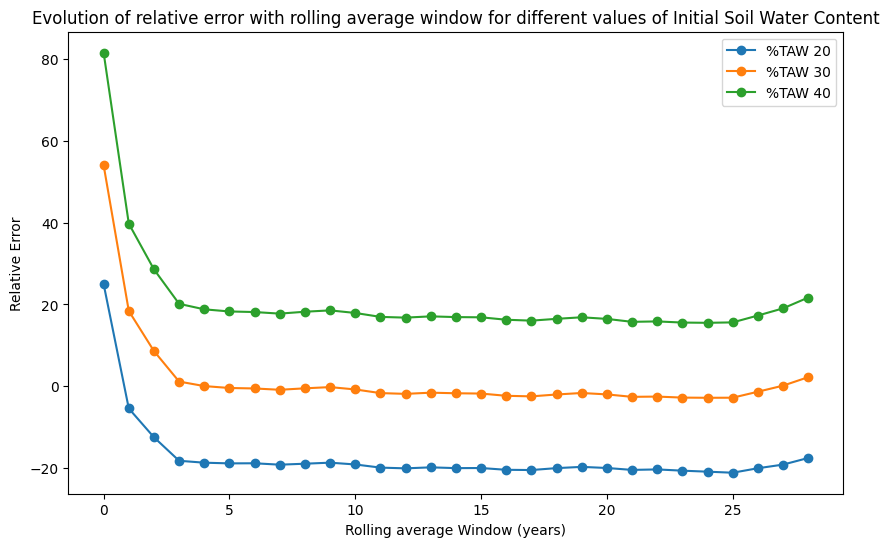

In [ ]:
re_df=pd.DataFrame(columns=['RE'])
from sklearn.metrics import mean_squared_error
from math import sqrt

plt.figure(figsize=(10,6))
for column in ScenarioI.columns:
 results45_Models=pd.DataFrame(ScenarioI[column])

 for t in range(1,30):
# Calculate mean squared error (MSE)
  AveragedModels=rolling_averages(results45_Models, t)
  AveragedHistorical=rolling_averages(statsAlm8019_Secano_df, t)

  re=((AveragedModels[column]-AveragedHistorical['Yield (tonne/ha)'])/AveragedHistorical['Yield (tonne/ha)'])*100
  re_df=re_df.append({'RE': re.mean()}, ignore_index=True)

 plt.plot(re_df.index, re_df, label=column, marker='o')
 re_df = re_df.drop(rmse_df.index, axis=0)  # Remove all rows (axis=0)
 re_df = rmse_df.drop(rmse_df.columns, axis=1)  # Remove all columns (axis=1)

 # Add labels and legend
plt.title(f"Evolution of relative error with rolling average window for different values of Initial Soil Water Content")
plt.xlabel('Rolling average Window (years)')
plt.ylabel('Relative Error')
plt.legend()
plt.show()

In [ ]:
re_df

**Nash Sutcliffe efficiencies**

In [ ]:
def nash_sutcliffe_efficiency(observed_df, modeled_df, column_name1, column_name2):
    """
    Calculate Nash-Sutcliffe Efficiency (NSE).

    Parameters:
    observed (list or numpy array): A list or array of observed values.
    simulated (list or numpy array): A list or array of simulated values.

    Returns:
    float: Nash-Sutcliffe Efficiency (NSE) value.
    """
    if len(observed_df) != len(modeled_df):
        raise ValueError("Dataframes must have the same length")

    # Extract the specified column from both dataframes
    observed = observed_df[column_name1].values
    simulated = modeled_df[column_name2].values

    # Calculate the mean of observed data
    mean_observed = observed.mean()


    # Calculate the NSE
    numerator = sum((observed[i] - simulated[i])**2  for i in range(len(observed)))
    denominator = sum((observed[i] - mean_observed)**2 for i in range(len(observed)))

    if denominator == 0:
        # Handle the case where the denominator is zero to avoid division by zero
       return float('NaN')
    else:
       nse = 1 - (numerator / denominator)
    return nse

<ipython-input-207-49b57b408eca>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NS_df=NS_df.append({'Nash Sutcliffe efficiencies': ns}, ignore_index=True)
<ipython-input-207-49b57b408eca>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NS_df=NS_df.append({'Nash Sutcliffe efficiencies': ns}, ignore_index=True)
<ipython-input-207-49b57b408eca>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NS_df=NS_df.append({'Nash Sutcliffe efficiencies': ns}, ignore_index=True)
<ipython-input-207-49b57b408eca>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NS_df=NS_df.append({'Nash Sutcliffe efficiencies': ns}, ignore_index=True)
<ipython-inp

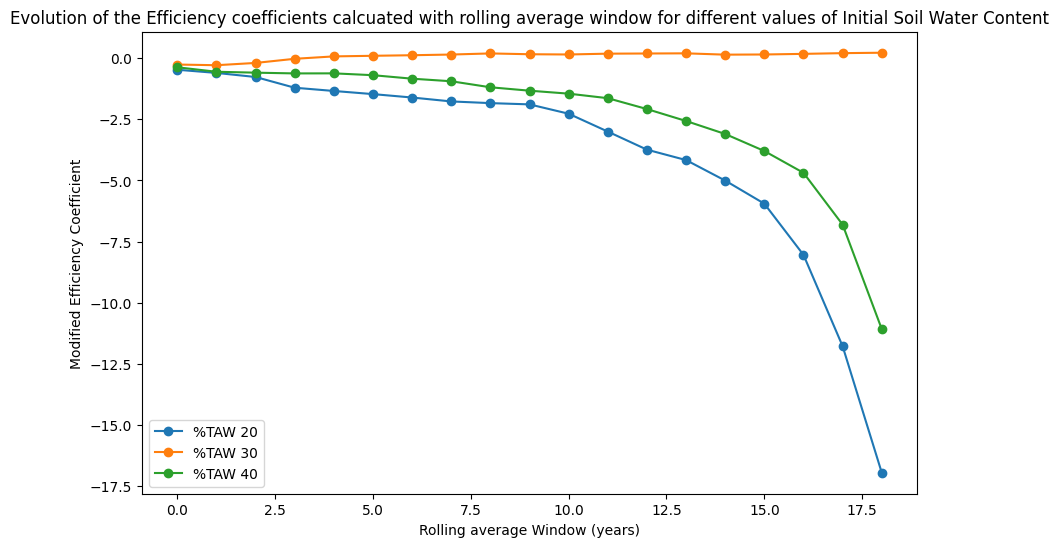

(None,
     Nash Sutcliffe efficiencies
 0                     -0.376577
 1                     -0.559635
 2                     -0.597004
 3                     -0.627583
 4                     -0.625063
 5                     -0.699908
 6                     -0.842843
 7                     -0.947875
 8                     -1.193874
 9                     -1.333092
 10                    -1.454433
 11                    -1.639757
 12                    -2.083571
 13                    -2.571896
 14                    -3.102712
 15                    -3.798387
 16                    -4.688641
 17                    -6.806562
 18                   -11.075754)

In [ ]:
NS_df=pd.DataFrame(columns=['Nash Sutcliffe efficiencies'])

def nse(predictions, targets):
    return (1-(np.sum((targets-predictions)**2)/np.sum((targets-np.mean(targets))**2)))


from sklearn.metrics import mean_squared_error
from math import sqrt

plt.figure(figsize=(10,6))
for column in ScenarioI.columns:
 results45_Models=pd.DataFrame(ScenarioI[column])
 NS_df = NS_df.drop(NS_df.index, axis=0)  # Remove all rows (axis=0)
 NS_df = NS_df.drop(NS_df.columns, axis=1)
 for t in range(1,20):
# Calculate mean squared error (MSE)
  AveragedModels=rolling_averages(results45_Models, t)
  AveragedHistorical=rolling_averages(statsAlm8019_Secano_df, t)

  ns=nash_sutcliffe_efficiency(AveragedHistorical, AveragedModels, 'Yield (tonne/ha)',column)
 #ns=nse(AveragedModels, AveragedHistorical )
  NS_df=NS_df.append({'Nash Sutcliffe efficiencies': ns}, ignore_index=True)

 plt.plot(NS_df.index, NS_df['Nash Sutcliffe efficiencies'], label=column, marker='o')


 # Add labels and legend
plt.title(f"Evolution of the Efficiency coefficients calcuated with rolling average window for different values of Initial Soil Water Content")
plt.xlabel('Rolling average Window (years)')
plt.ylabel('Modified Efficiency Coefficient')
plt.legend()
plt.show(), NS_df

In [ ]:
print(NS_df)

    Nash Sutcliffe efficiencies
0                  3.187796e+15
1                  6.303686e+15
2                  2.493259e+15
3                  1.807295e+15
4                 -1.182329e+15
..                          ...
85                          NaN
86                          NaN
87                 2.690462e+15
88                          NaN
89                          NaN

[90 rows x 1 columns]


# **Coefficient of variation**

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  if where is not np._NoValue:
<ipython-input-120-23108b04b06c>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CVhist_df=CVhist_df.append(cv_hist, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  if where is not np._NoValue:
<ipython-input-120-23108b04b06c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CV_df=CV_df.a

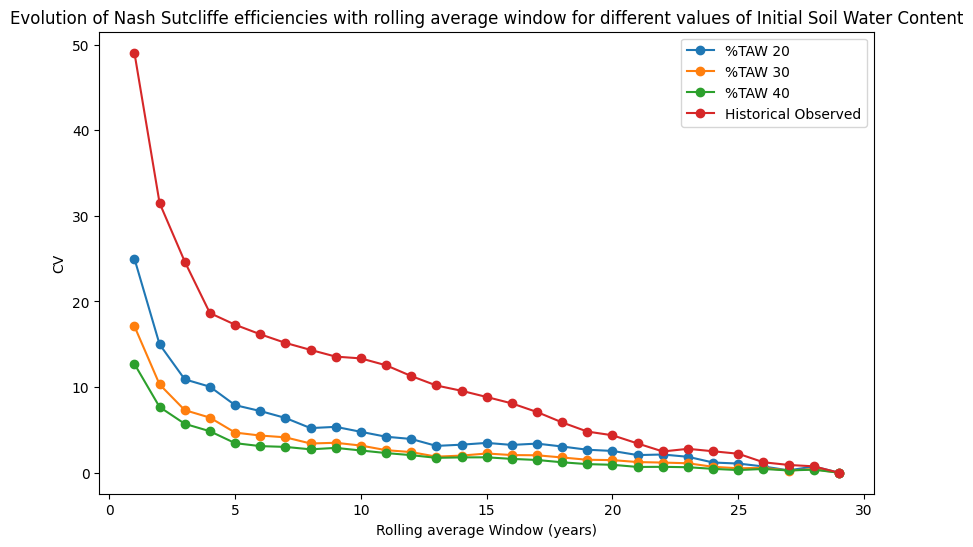

In [ ]:
CV_df=pd.DataFrame()
CVhist_df=pd.DataFrame()

from sklearn.metrics import mean_squared_error
from math import sqrt

plt.figure(figsize=(10,6))
for column in ScenarioI.columns:
 results45_Models=pd.DataFrame(ScenarioI[column])
 CVhist_df = CVhist_df.drop(CVhist_df.index, axis=0)  # Remove all rows (axis=0)
 CVhist_df = CVhist_df.drop(CVhist_df.columns, axis=1)
 for t in range(1,31):
# Calculate mean squared error (MSE)
  AveragedModels=rolling_averages(results45_Models, t)
  AveragedHistorical=rolling_averages(statsAlm8019_Secano_df, t)

 # Calculate the mean and standard deviation
  mean = np.mean(AveragedHistorical)
  std_dev = np.std(AveragedHistorical)
 # Calculate the coefficient of variation
  cv_hist = (std_dev / mean) * 100
  CVhist_df=CVhist_df.append(cv_hist, ignore_index=True)

 # Calculate the mean and standard deviation
  mean = np.mean(AveragedModels)
  std_dev = np.std(AveragedModels)
 # Calculate the coefficient of variation
  cv_mod= (std_dev / mean) * 100

  CV_df=CV_df.append(cv_mod, ignore_index=True)

 plt.plot([x for x in range(1,31)], CV_df, label=column, marker='o')
 CV_df = CV_df.drop(CV_df.index, axis=0)  # Remove all rows (axis=0)
 CV_df = CV_df.drop(CV_df.columns, axis=1)


plt.plot([x for x in range(1,31)], CVhist_df, label='Historical Observed', marker='o')
 # Add labels and legend
plt.title(f"Evolution of Nash Sutcliffe efficiencies with rolling average window for different values of Initial Soil Water Content")
plt.xlabel('Rolling average Window (years)')
plt.ylabel('CV')
plt.legend()
plt.show()

# **Index of Agreement**

In [ ]:
def index_of_agreement(observed, predicted, column_name1, column_name2):
    """
    Calculate Willmott's Index of Agreement (d) between observed and predicted data.

    Parameters:
    observed (pd.DataFrame or pd.Series): DataFrame or Series containing observed data.
    predicted (pd.DataFrame or pd.Series): DataFrame or Series containing predicted data.

    Returns:
    float: Willmott's Index of Agreement (d).
    """

    observed = observed[column_name1].values
    predicted = predicted[column_name2].values

    n = len(observed)
    obs_mean = observed.mean()

    # Calculate the numerator

    numerator = sum((observed[i] - predicted[i])**2  for i in range(len(observed)))

    # Calculate the denominator
    denominator = sum((abs(predicted[i] - obs_mean) + abs(observed[i] - obs_mean))**2 for i in range(len(observed)))

    if denominator == 0:
        # Handle the case where the denominator is zero to avoid division by zero
       return float('NaN')
    else:
    # Calculate d
      d = 1 - (numerator / denominator)
    return d


<ipython-input-210-1939ddecb820>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d_df=d_df.append({'d': d}, ignore_index=True)
<ipython-input-210-1939ddecb820>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d_df=d_df.append({'d': d}, ignore_index=True)
<ipython-input-210-1939ddecb820>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d_df=d_df.append({'d': d}, ignore_index=True)
<ipython-input-210-1939ddecb820>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d_df=d_df.append({'d': d}, ignore_index=True)
<ipython-input-210-1939ddecb820>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a f

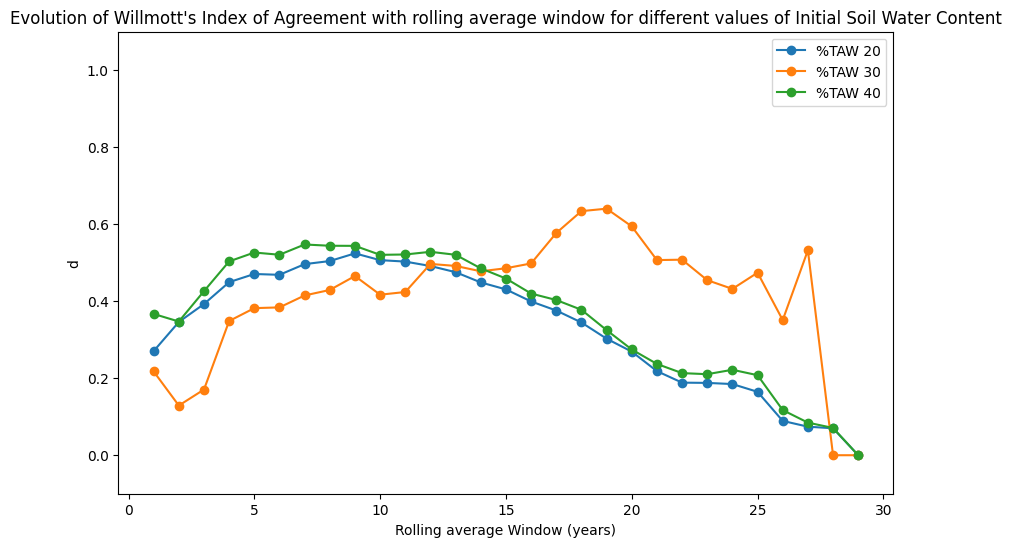

In [ ]:
d_df=pd.DataFrame(columns=['d'])


plt.figure(figsize=(10,6))
for column in ScenarioI.columns:
 results45_Models=pd.DataFrame(ScenarioI[column])

 for t in range(1,31):
# Calculate mean squared error (MSE)
  AveragedModels=rolling_averages(results45_Models, t)
  AveragedHistorical=rolling_averages(statsAlm8019_Secano_df, t)

  d=index_of_agreement(AveragedHistorical, AveragedModels, 'Yield (tonne/ha)', column)
 #ns=nse(AveragedModels, AveragedHistorical )
  d_df=d_df.append({'d': d}, ignore_index=True)

 plt.plot(d_df.index+1, d_df['d'], label=column, marker='o')
 d_df = d_df.drop(d_df.index, axis=0)  # Remove all rows (axis=0)
 d_df = d_df.drop(d_df.columns, axis=1)

 # Add labels and legend
plt.ylim(-0.1, 1.1)
plt.title(f"Evolution of Willmott's Index of Agreement with rolling average window for different values of Initial Soil Water Content")
plt.xlabel('Rolling average Window (years)')
plt.ylabel('d')
plt.legend()
plt.show()